## Importing relevant libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None) # set option to display full columns

### Data Preprocess

In [3]:
# wrangle function
def wrangle(filepath):
    # Read csv file into Data Frame
    df = pd.read_csv(filepath)
    # Clean column names
    df = df.rename(columns=lambda x: x.strip().strip('"'))

# Rename columns
    df['pilotstate'] = df['pilotstate(EV_DISCONNECTED = \'A\'_EV_CONNECTED = \'B1\'_WAITING_FOR_EV = \'B2\'_STOP_MODE = \'C1\'_CHARGING_MAX_POWER = \'C2\'_FAULT_RESTART = \'F\'']
    df['loadcontrolgridimportexport-n'] = df['zappimode(1=FAST.2=ECO.3=ECO+)']
    df['zappimode'] = df[')']
    df['dsrdataload-n'] = df['loadcontrolgridimportexport']
    df['dsrdataseconds-n'] = df['dsrdataload']

# Drop redundant columns
    df.drop(columns=['pilotstate(EV_DISCONNECTED = \'A\'_EV_CONNECTED = \'B1\'_WAITING_FOR_EV = \'B2\'_STOP_MODE = \'C1\'_CHARGING_MAX_POWER = \'C2\'_FAULT_RESTART = \'F\'',
            'zappimode(1=FAST.2=ECO.3=ECO+)', 'loadcontrolgridimportexport', 'dsrdataload', 'dsrdataseconds', ')'], inplace=True)

# Convert time format
    df = df.set_index('timestamp')
    df.index = pd.to_datetime(df.index, unit='s')
    return df


## Loading Dataset

In [4]:
data = wrangle('./Data/chargerdata2_2023_06_10_Anonymized.csv')

data


id  power  dsrloadcontrolactive  voltage  frequency  \
timestamp                                                                  
2023-05-01 16:25:12   1      0                 False     2389       4997   
2023-05-01 16:25:12   2      0                 False     2419       4994   
2023-05-01 16:25:12   3      0                 False     2408       4995   
2023-05-01 16:25:12   4      0                 False     2399       4988   
2023-05-01 16:25:12   5      0                 False     2385       4993   
...                  ..    ...                   ...      ...        ...   
2023-05-01 16:25:12  33      0                 False     2334       4995   
2023-05-01 16:25:12  34   1148                 False     2219       4995   
2023-05-01 16:25:12  35      0                 False     2376       4996   
2023-05-01 16:25:12  36      0                 False     2406       4995   
2023-05-01 16:25:12  37      0                 False     2397       4994   

                     chargeenergy pilotstate  loadcontrolgridimportexport-n  \
timestamp                                                                     
2023-05-01 16:25:12         18.20          A                            898   
2023-05-01 16:25:12         36.53          A                          -2219   
2023-05-01 16:25:12         24.28          A                            400   
2023-05-01 16:25:12         17.44          A                             -4   
2023-05-01 16:25:12          4.53        NaN                             -4   
...                           ...        ...                            ...   
2023-05-01 16:25:12         18.97          A                            420   
2023-05-01 16:25:12          1.21         C2                            325   
2023-05-01 16:25:12          0.00          A                             30   
2023-05-01 16:25:12         36.28          A                             30   
2023-05-01 16:25:12         15.29          A                           -775   

                    zappimode  dsrdataload-n  dsrdataseconds-n  
timestamp                                                       
2023-05-01 16:25:12      FAST              0                 0  
2023-05-01 16:25:12      FAST              0                 0  
2023-05-01 16:25:12      FAST              0                 0  
2023-05-01 16:25:12  ECO_PLUS              0                 0  
2023-05-01 16:25:12       NaN              0                 0  
...                       ...            ...               ...  
2023-05-01 16:25:12      FAST              0                 0  
2023-05-01 16:25:12  ECO_PLUS              0                 0  
2023-05-01 16:25:12      FAST              0                 0  
2023-05-01 16:25:12      STOP              0                 0  
2023-05-01 16:25:12       ECO              0                 0  

[6297793 rows x 11 columns]

In [5]:
# Sorting data by index in ascending order
data.sort_index(inplace=True)

data

id  power  dsrloadcontrolactive  voltage  frequency  \
timestamp                                                                  
2023-02-05 23:43:51  26   1572                 False     2380       4990   
2023-02-05 23:43:51  15      0                 False     2475       4996   
2023-02-05 23:43:51  14      0                 False     2443       4998   
2023-02-05 23:43:51  13      0                 False     2374       4998   
2023-02-05 23:43:51  12   7019                 False     2256       4998   
...                  ..    ...                   ...      ...        ...   
2023-06-11 06:38:24   3      0                 False     2401       4991   
2023-06-11 06:38:24   4      0                 False     2447       4988   
2023-06-11 06:38:24   5      0                 False     2399       4993   
2023-06-11 06:38:24  34   1563                 False     2281       4991   
2023-06-11 06:38:24  25      0                 False     2410       4995   

                     chargeenergy pilotstate  loadcontrolgridimportexport-n  \
timestamp                                                                     
2023-02-05 23:43:51          6.88         C2                          -1011   
2023-02-05 23:43:51          0.00          A                            611   
2023-02-05 23:43:51         11.92          A                            506   
2023-02-05 23:43:51          0.00          A                            268   
2023-02-05 23:43:51          4.98         C2                           8475   
...                           ...        ...                            ...   
2023-06-11 06:38:24         10.44          A                            -46   
2023-06-11 06:38:24         18.81          A                              4   
2023-06-11 06:38:24          0.00        NaN                              4   
2023-06-11 06:38:24          4.33         C2                            293   
2023-06-11 06:38:24          4.95          A                             51   

                    zappimode  dsrdataload-n  dsrdataseconds-n  
timestamp                                                       
2023-02-05 23:43:51       ECO           1282                 0  
2023-02-05 23:43:51      FAST              0                 0  
2023-02-05 23:43:51  ECO_PLUS              0                 0  
2023-02-05 23:43:51      FAST              0                 0  
2023-02-05 23:43:51      FAST              0                 0  
...                       ...            ...               ...  
2023-06-11 06:38:24  ECO_PLUS              0                 0  
2023-06-11 06:38:24  ECO_PLUS              0                 0  
2023-06-11 06:38:24       NaN              0                 0  
2023-06-11 06:38:24  ECO_PLUS              0                 0  
2023-06-11 06:38:24       ECO              0                 0  

[6297793 rows x 11 columns]

In [6]:
data.isna().sum()

id                                     0
power                                  0
dsrloadcontrolactive                   0
voltage                                0
frequency                              0
chargeenergy                           0
pilotstate                       1015758
loadcontrolgridimportexport-n          0
zappimode                        1015758
dsrdataload-n                          0
dsrdataseconds-n                       0
dtype: int64

### Missing Values

- About 16% of values in pilotstate and zappimode

In [7]:
# checking for unique values in pilotstate and zappimode
print('Pilotstate:', data.pilotstate.unique())
print('Zappimode:', data.zappimode.unique())

Pilotstate: ['C2' 'A' 'B2' nan 'B1' 'C1' 'F']
Zappimode: ['ECO' 'FAST' 'ECO_PLUS' 'STOP' nan]


### Summary Statistics for ALL Charging Stations

In [9]:
data.columns

Index(['id', 'power', 'dsrloadcontrolactive', 'voltage', 'frequency',
       'chargeenergy', 'pilotstate', 'loadcontrolgridimportexport-n',
       'zappimode', 'dsrdataload-n', 'dsrdataseconds-n'],
      dtype='object')

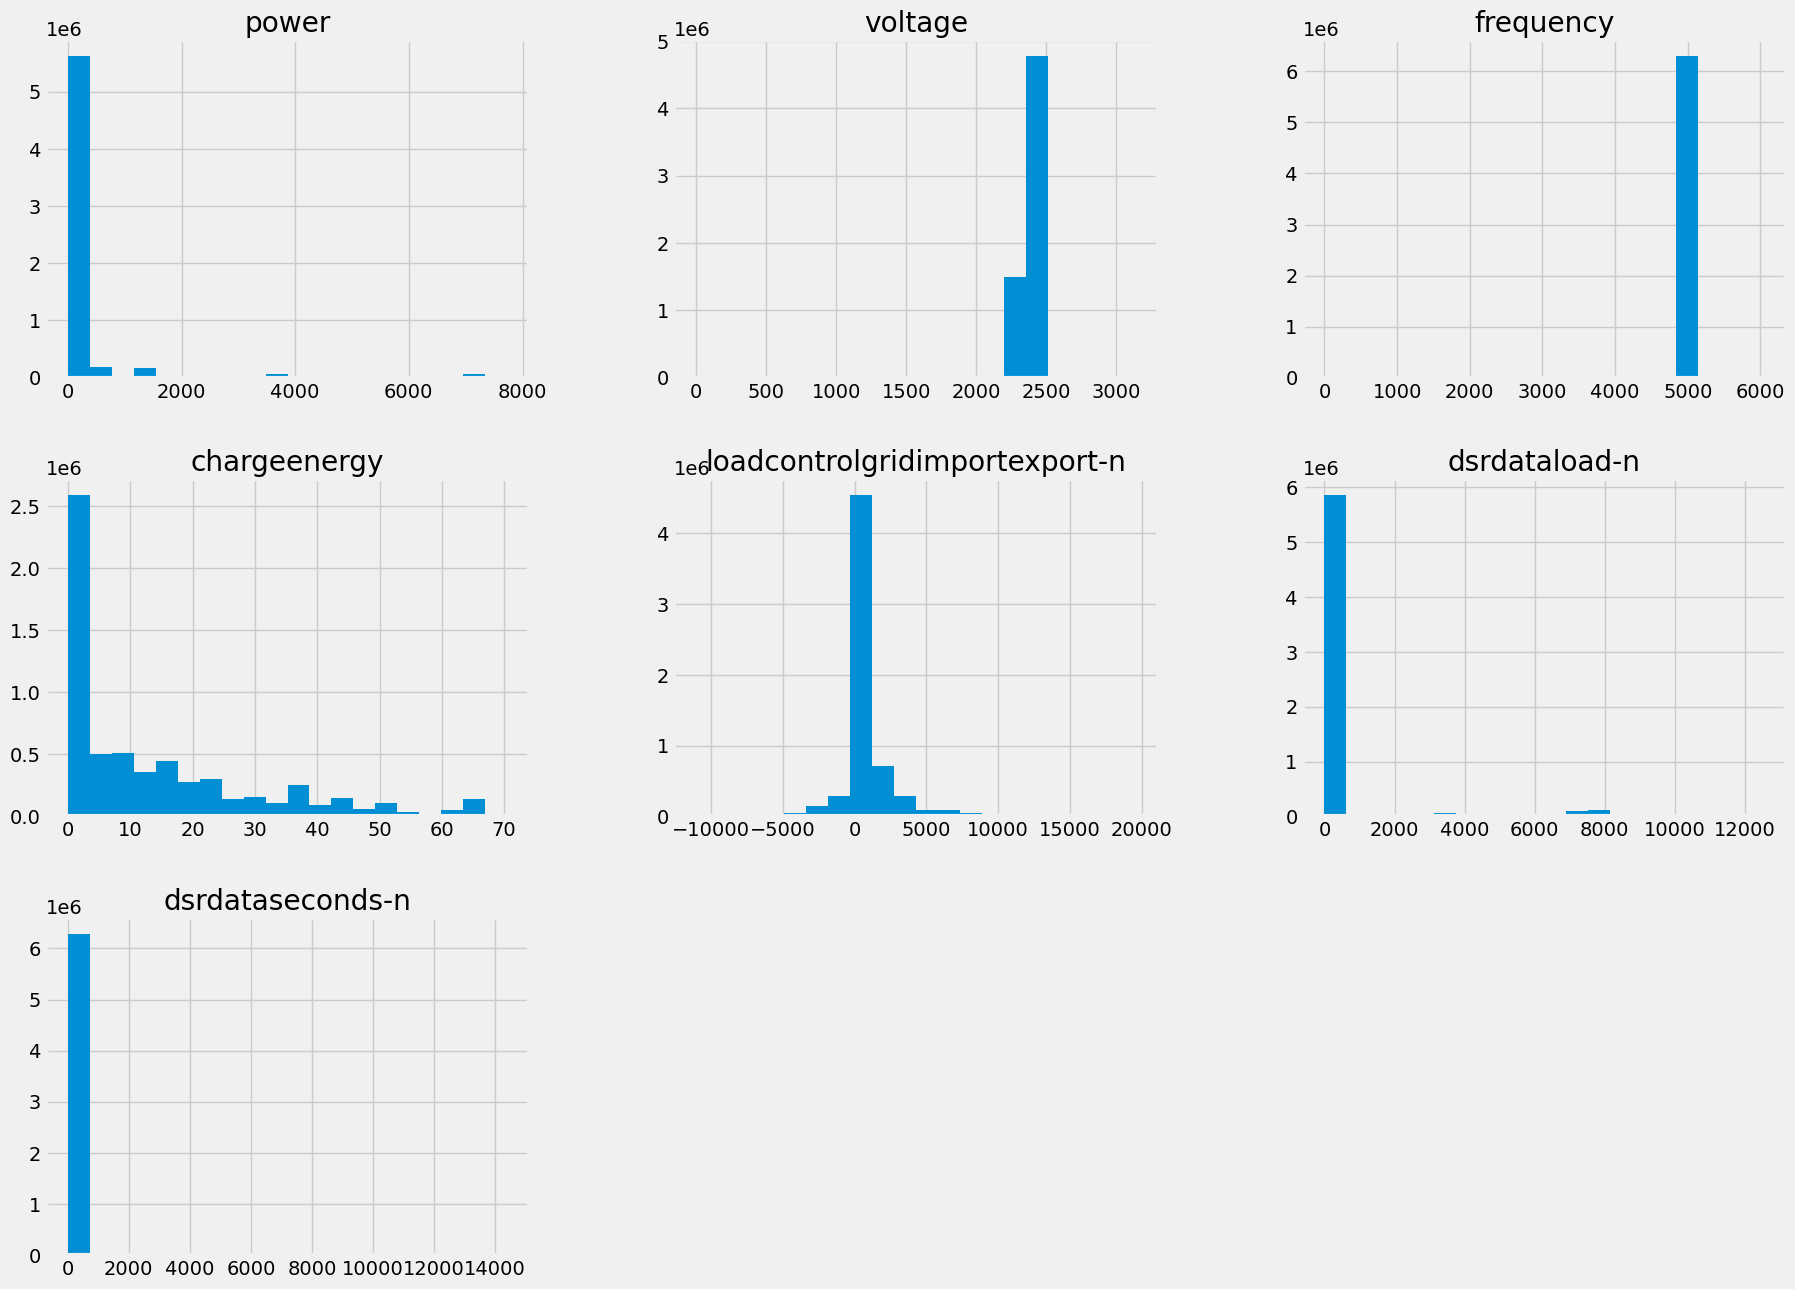

In [19]:
data[['power', 'voltage', 'frequency', 'chargeenergy', 
      'loadcontrolgridimportexport-n','dsrdataload-n','dsrdataseconds-n']].hist(bins=20, figsize=(20,15))
plt.show()

data1[]

In [26]:
# Label Printer
def label_print(ax):
    for p in ax.patches: #Adding labels on bars
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()),
                ha = 'center', va ='center', xytext = (0,5), textcoords = 'offset points')

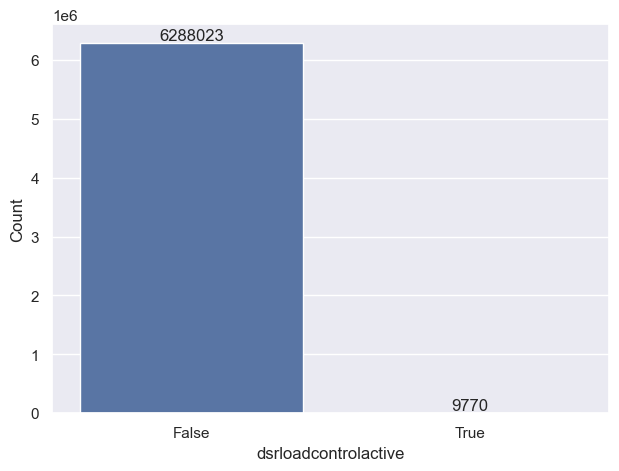

In [29]:
# Creating countplot using Seaborn
sns.set(style='darkgrid')
ax = sns.countplot(x='dsrloadcontrolactive', data=data)

label_print(ax)

#Seting labels
plt.xlabel('dsrloadcontrolactive')
plt.ylabel('Count')
plt.show()

In [22]:
data.dsrloadcontrolactive.value_counts(normalize=True)

False    0.998449
True     0.001551
Name: dsrloadcontrolactive, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

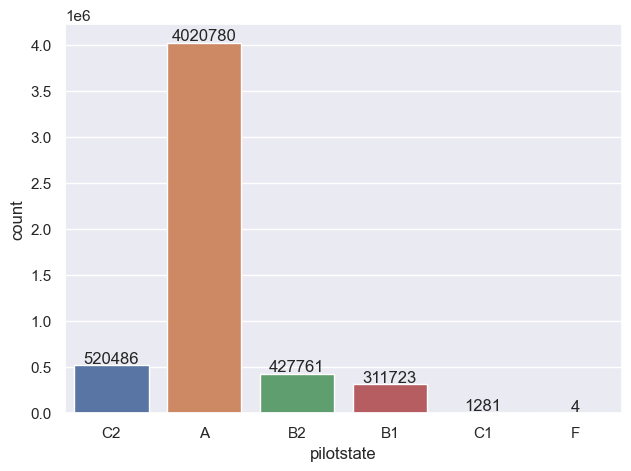

In [100]:
ax = sns.countplot(x='pilotstate', data=data)

label_print(ax)

#Label and plot
plt.xlabel('pilotstate')
plt.ylabel('count')
plt.show

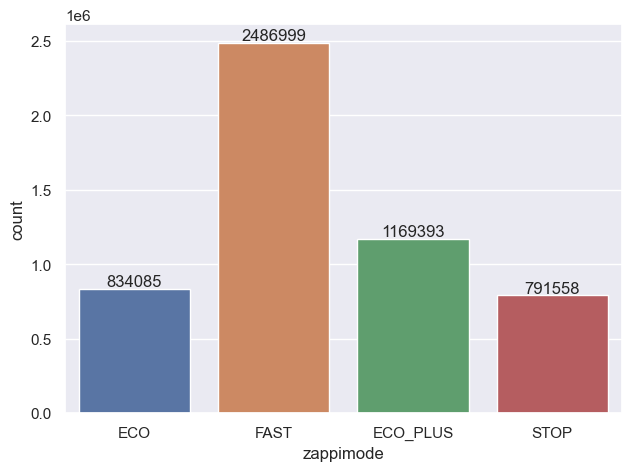

In [30]:
ax = sns.countplot(x='zappimode', data=data)

label_print(ax)

plt.xlabel('zappimode')
plt.ylabel('count')
plt.show()

# EDA

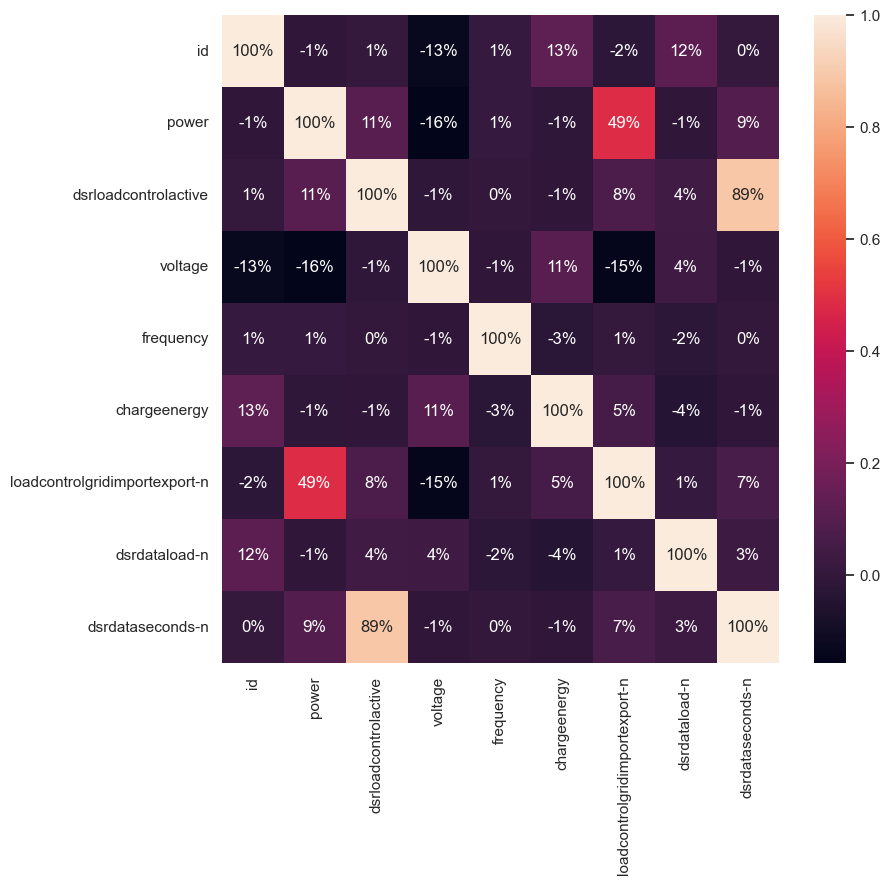

In [32]:
# Plot correlation heatmap

plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, fmt='.0%', color='Blue')
plt.show()

# Examining Relationship between Power and Other Features

In [8]:
def relationship_check(target, other):
    plt.figure(figsize=(12,8))

    # Determine if other feature is numeric or categorical 
    # If numeric, plot scatterplot
    if (data[other].dtype == 'int64' or data[other].dtype == 'float64'): 
        sns.scatterplot(data=data, x=other, y=target)

    elif (data[other].dtype in ['object'] and data[target].dtype in ['object']):
        print(pd.crosstab(data[target], data[other]))
        
        #If categorical, plot boxplot
    else:
        sns.boxplot(data=data, x=other, y=target)

        
    plt.title("Relationship between " + str(target) + " " + "and"  + " " + str(other))
    plt.show()

In [11]:
# create list of column labels
data.drop(columns=['id'])
data_columns=[]
for col in data.columns:
    if col != 'id':
        data_columns.append(col)
data_columns.sort()
print(data_columns)
#relationship_check(target='power', other='frequency')

['chargeenergy', 'dsrdataload-n', 'dsrdataseconds-n', 'dsrloadcontrolactive', 'frequency', 'loadcontrolgridimportexport-n', 'pilotstate', 'power', 'voltage', 'zappimode']


## Relationship Charts

### Relationship between 'Power' and 'Other' features

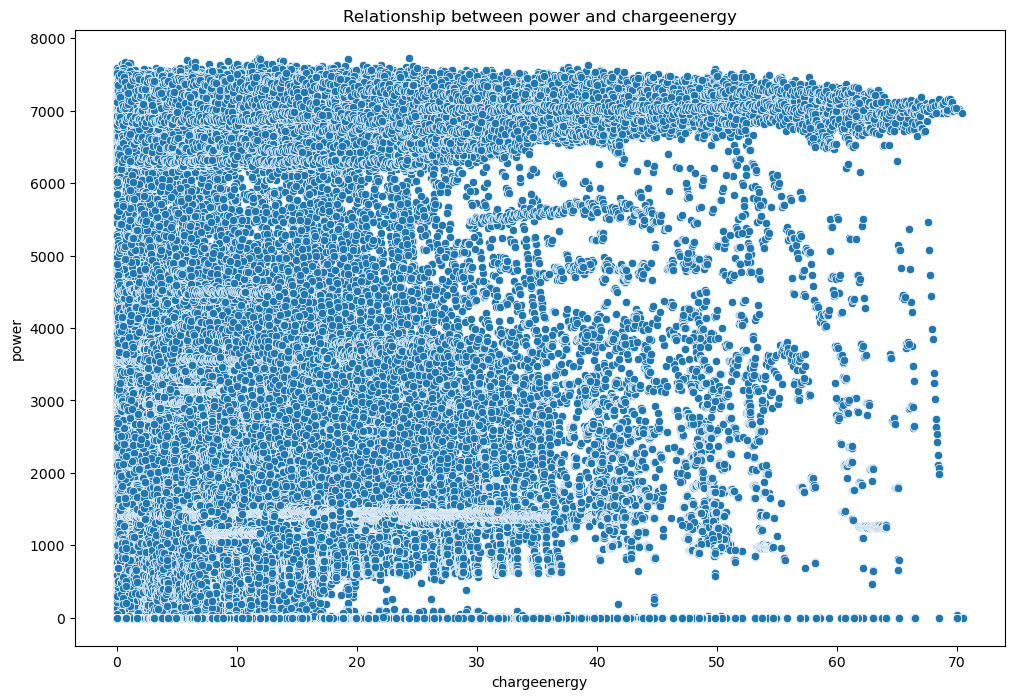

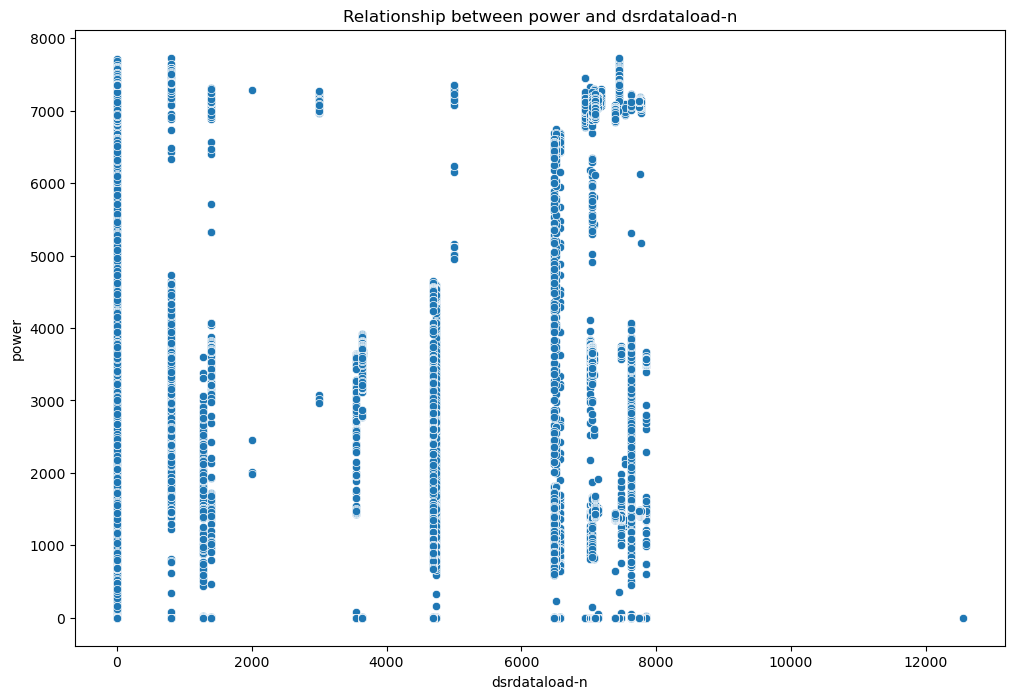

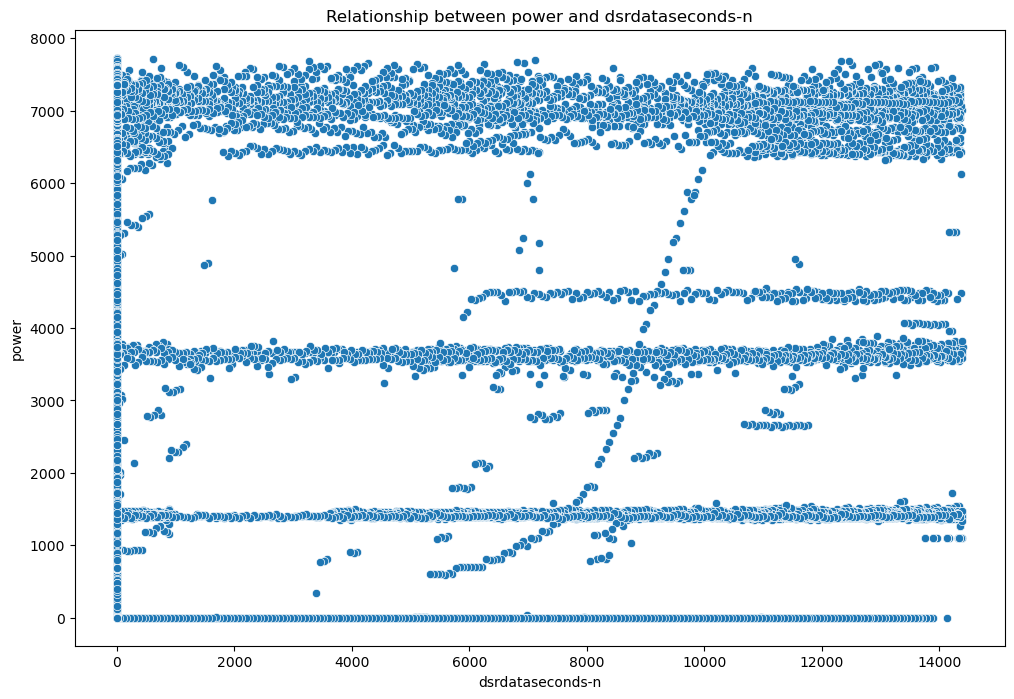

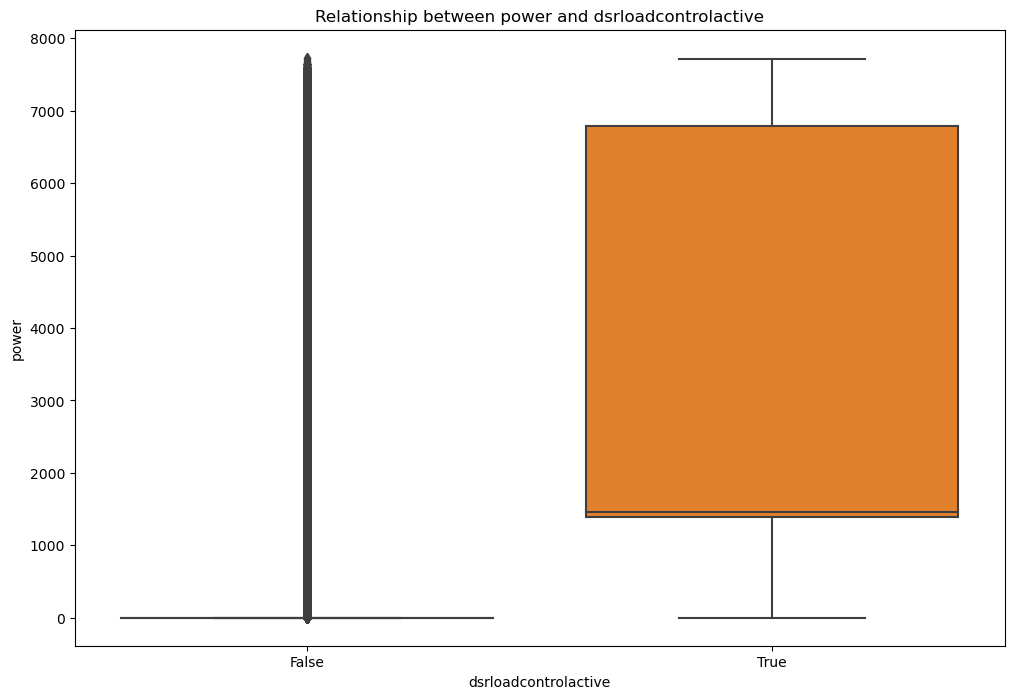

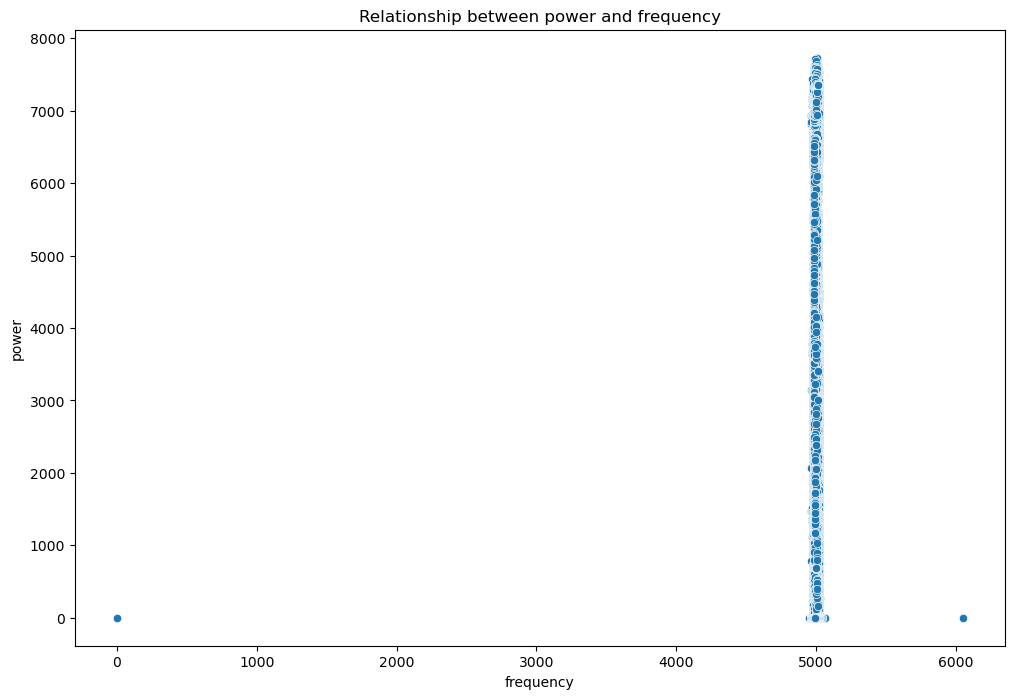

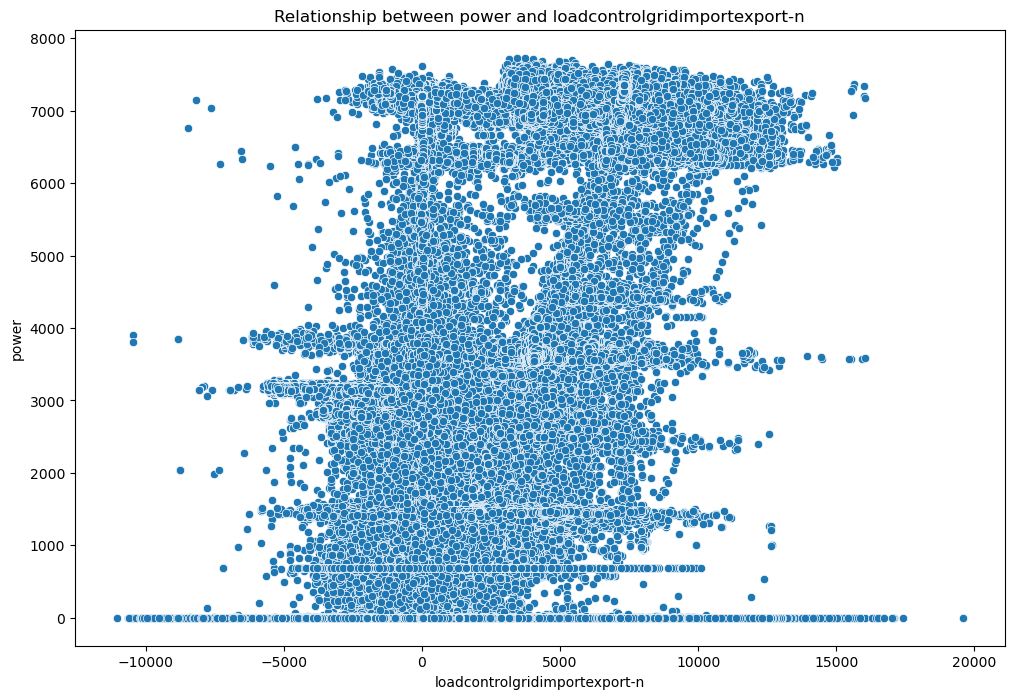

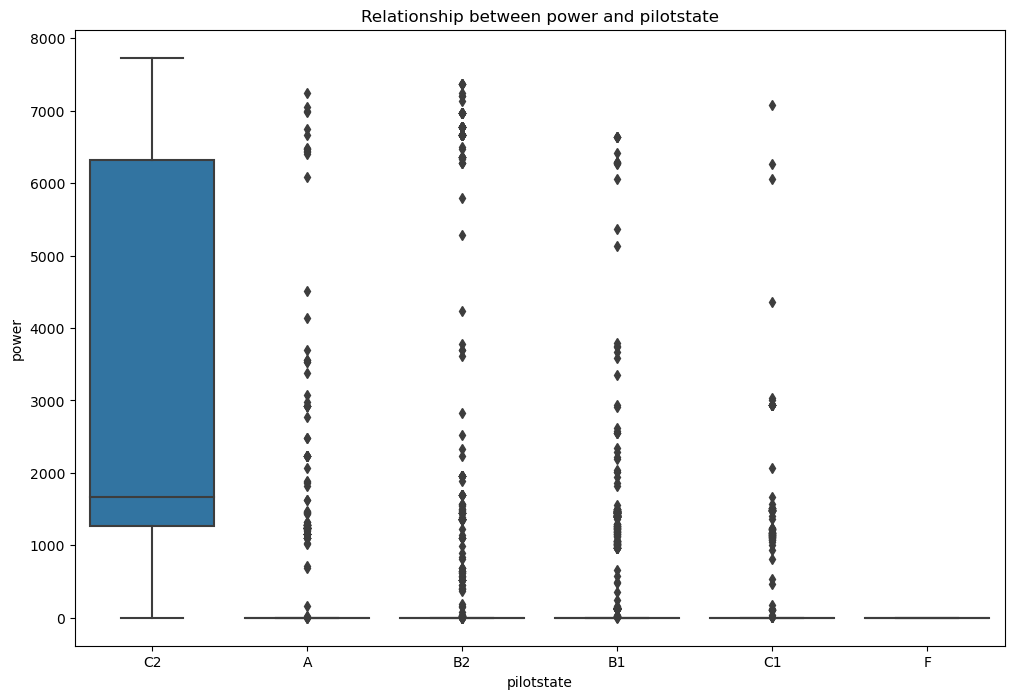

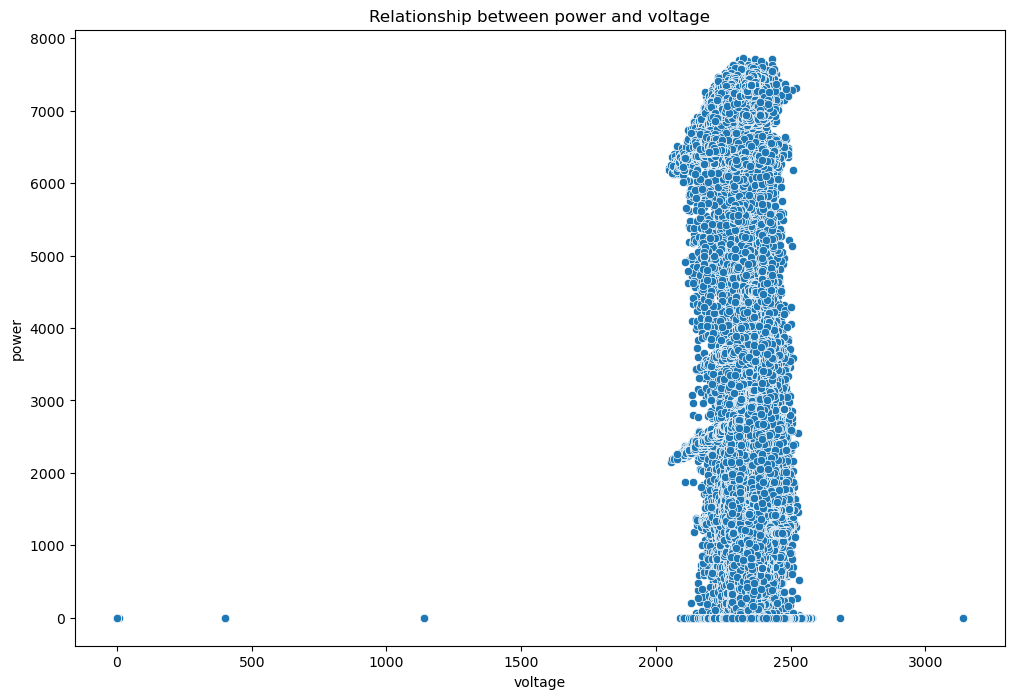

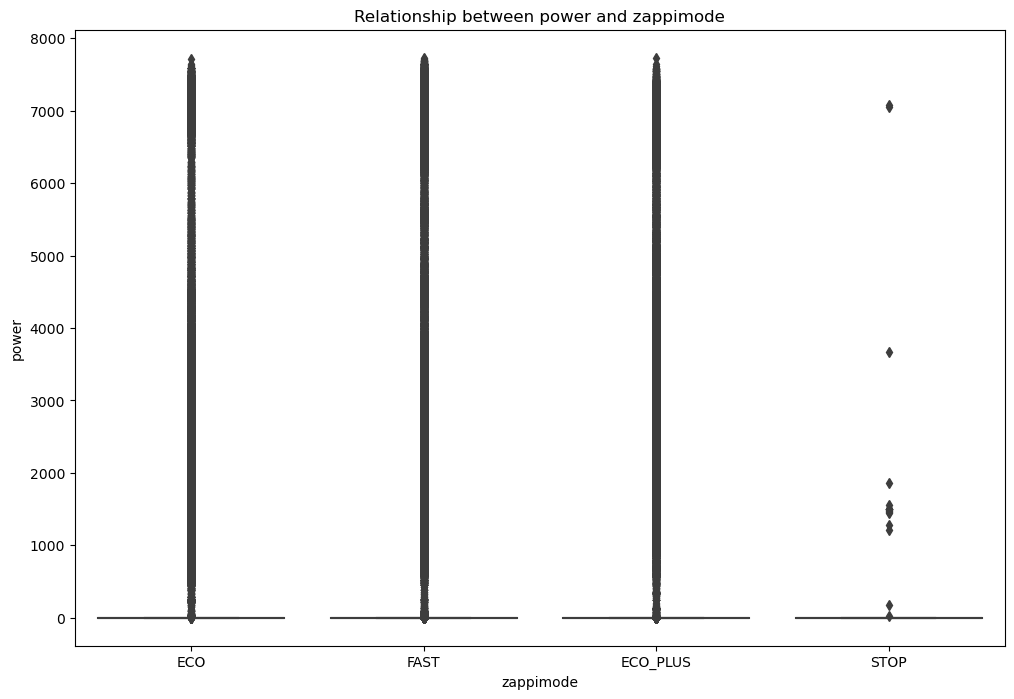

In [12]:
import itertools
#Plot relationship charts


for combination in itertools.product(list(data_columns), repeat=2):

    if combination[0] != combination[1]:
        if combination[0]=='power':
            relationship_check(target=combination[0], other=combination[1])

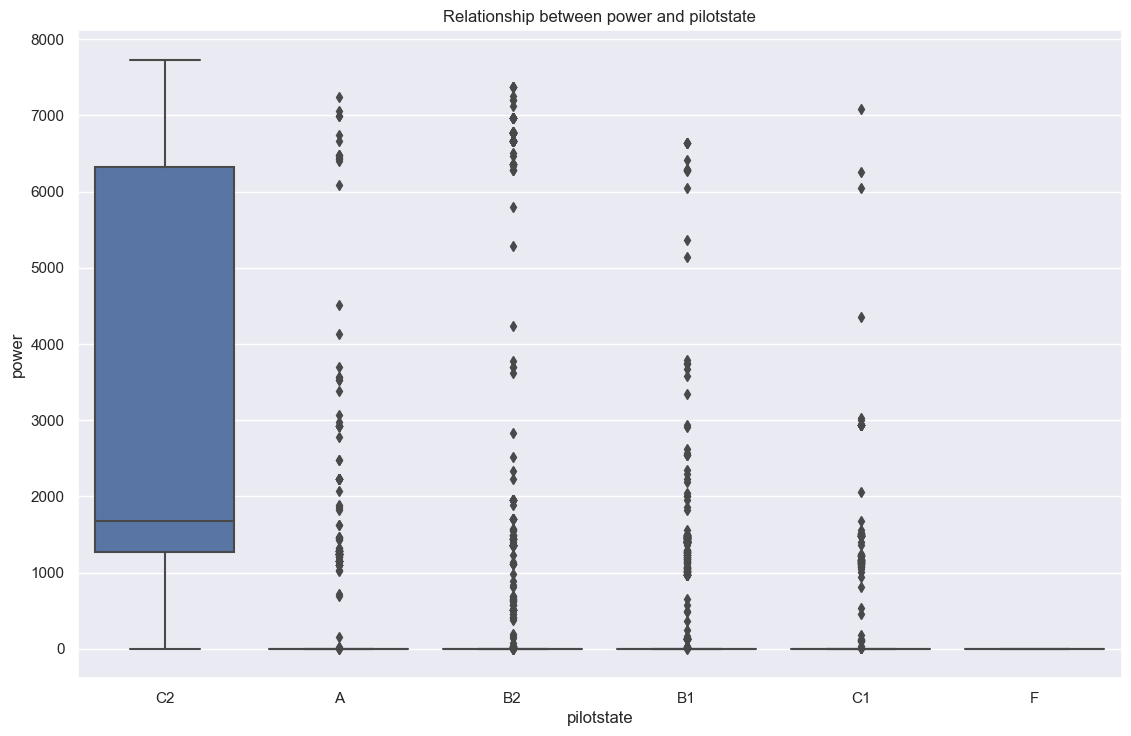

In [86]:
relationship_check(target='power', other='pilotstate')

### NB: When Pilotstate is F (Fault Restart), Power is Zero

In [88]:
data[data.power > 0]['pilotstate'].value_counts()

C2    517379
B2       298
B1       241
A        173
C1       101
Name: pilotstate, dtype: int64

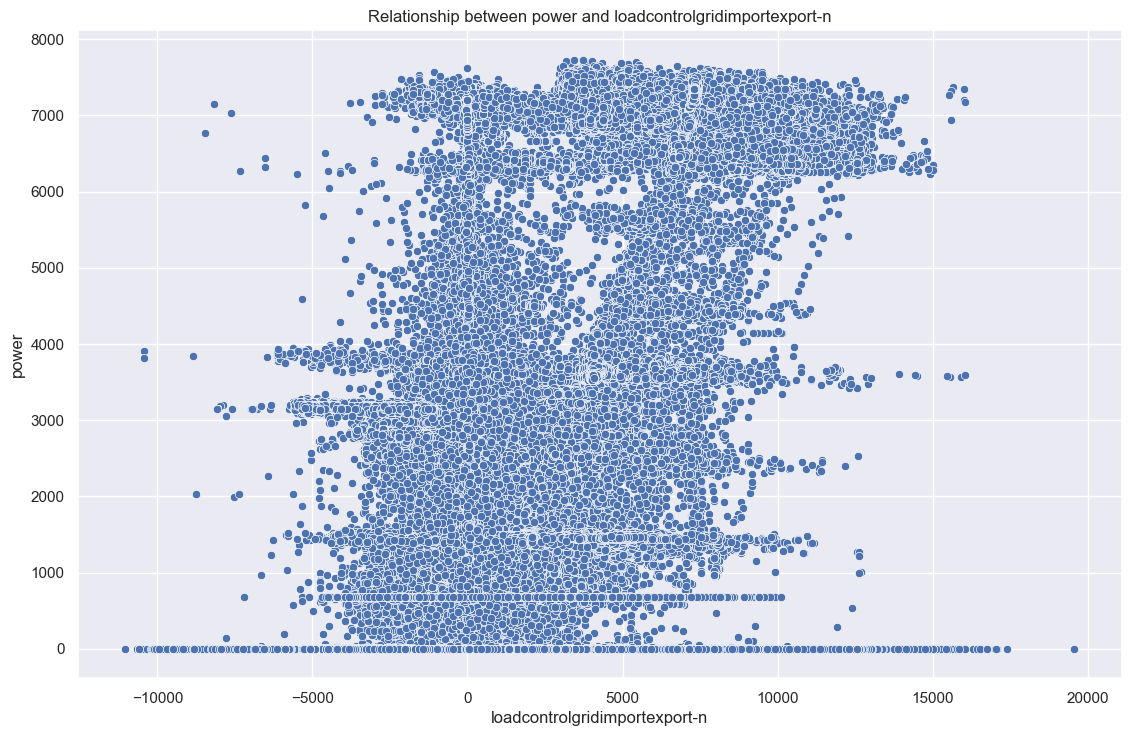

In [89]:
relationship_check(target='power', other='loadcontrolgridimportexport-n')

### Relationship between Voltage and other features

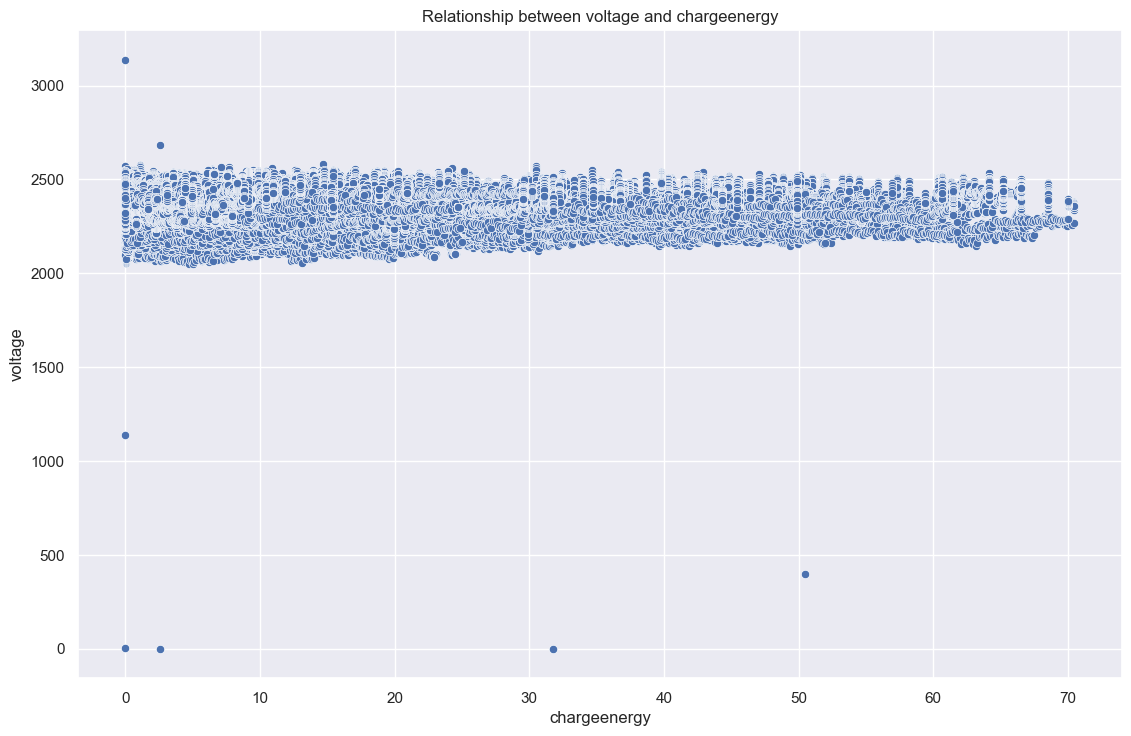

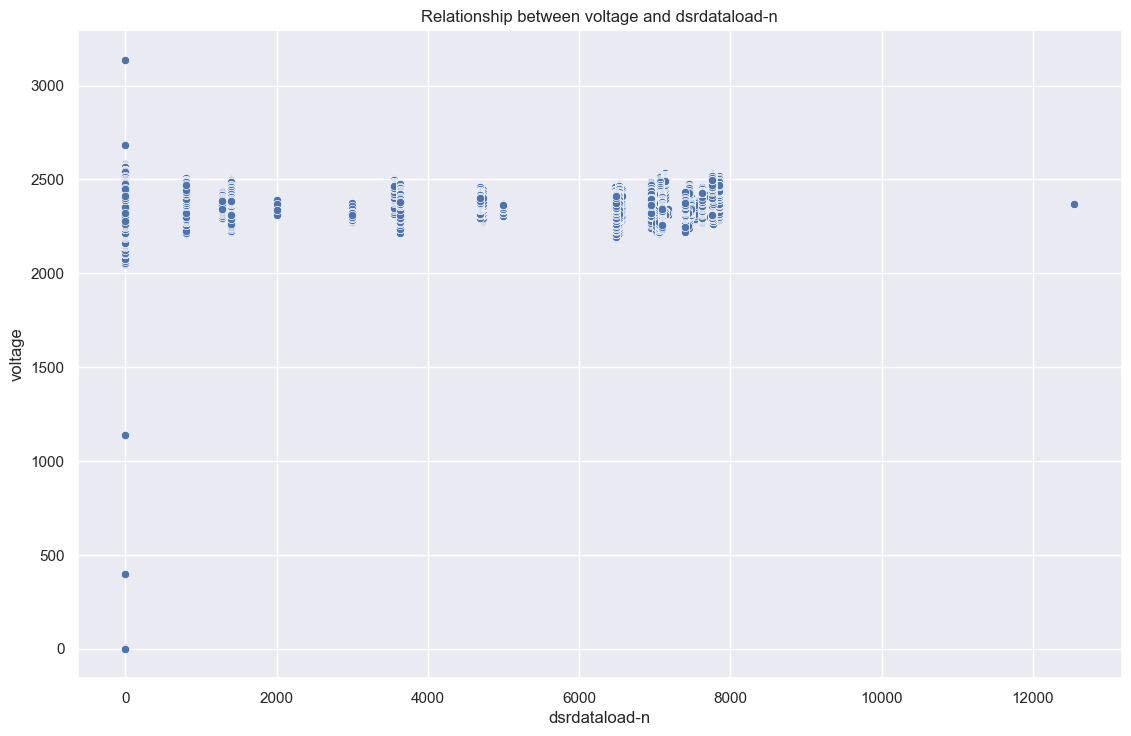

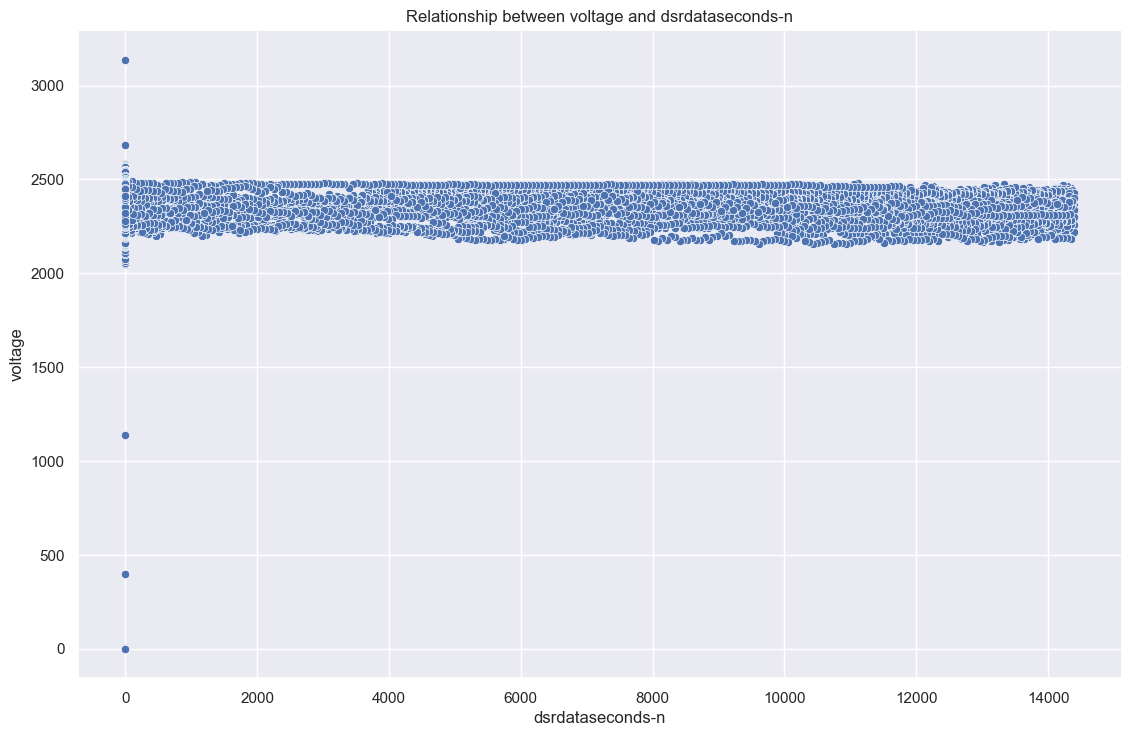

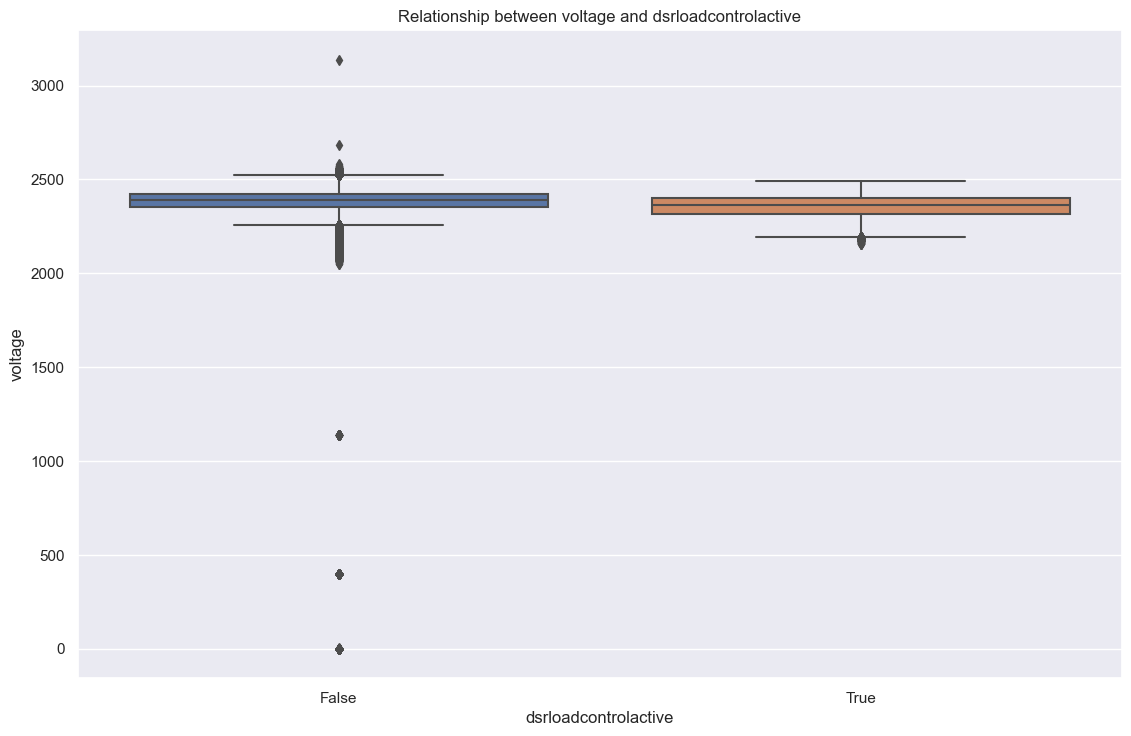

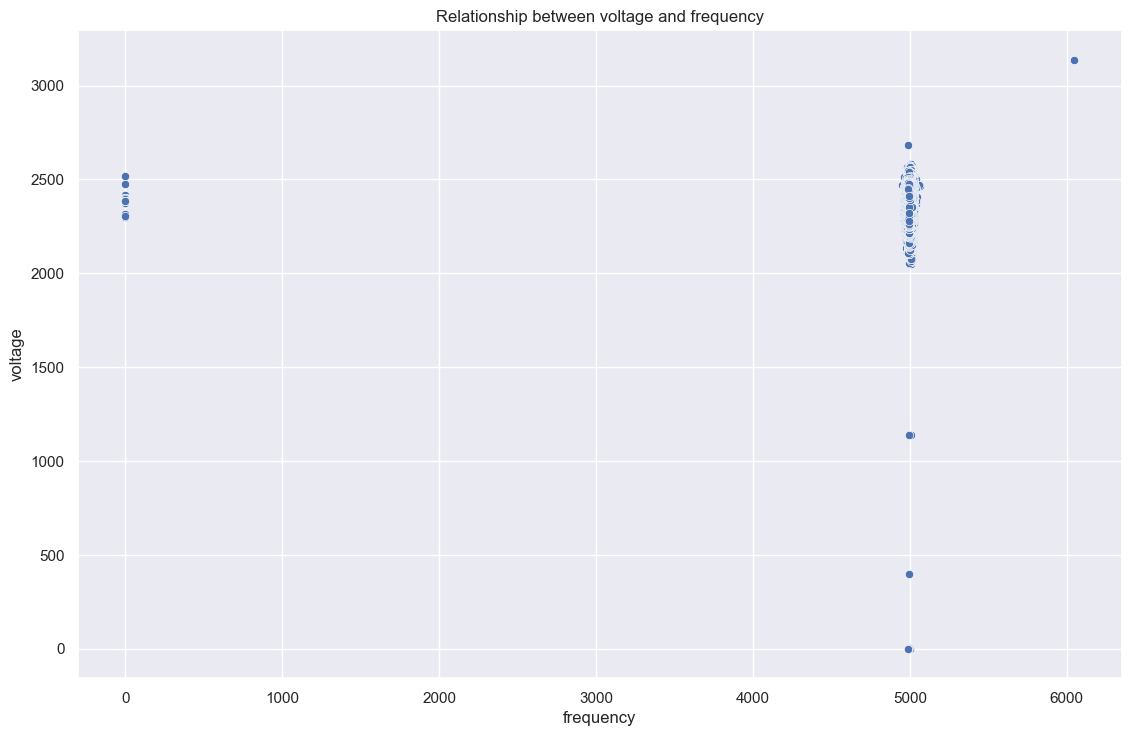

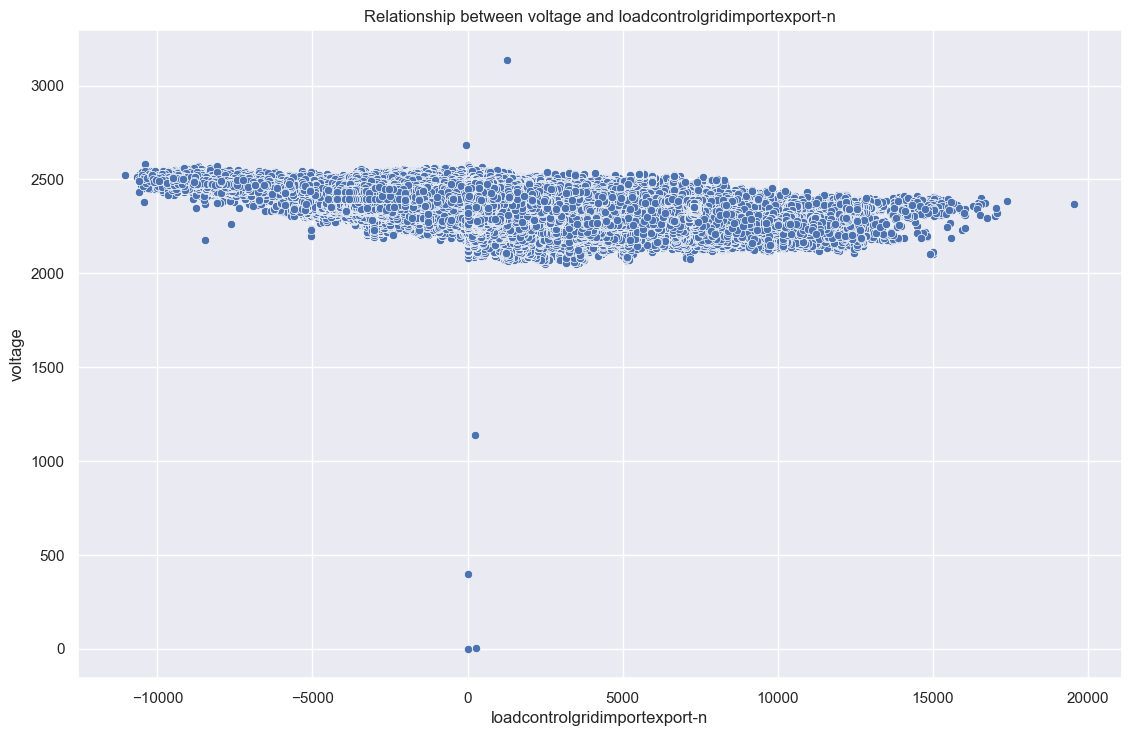

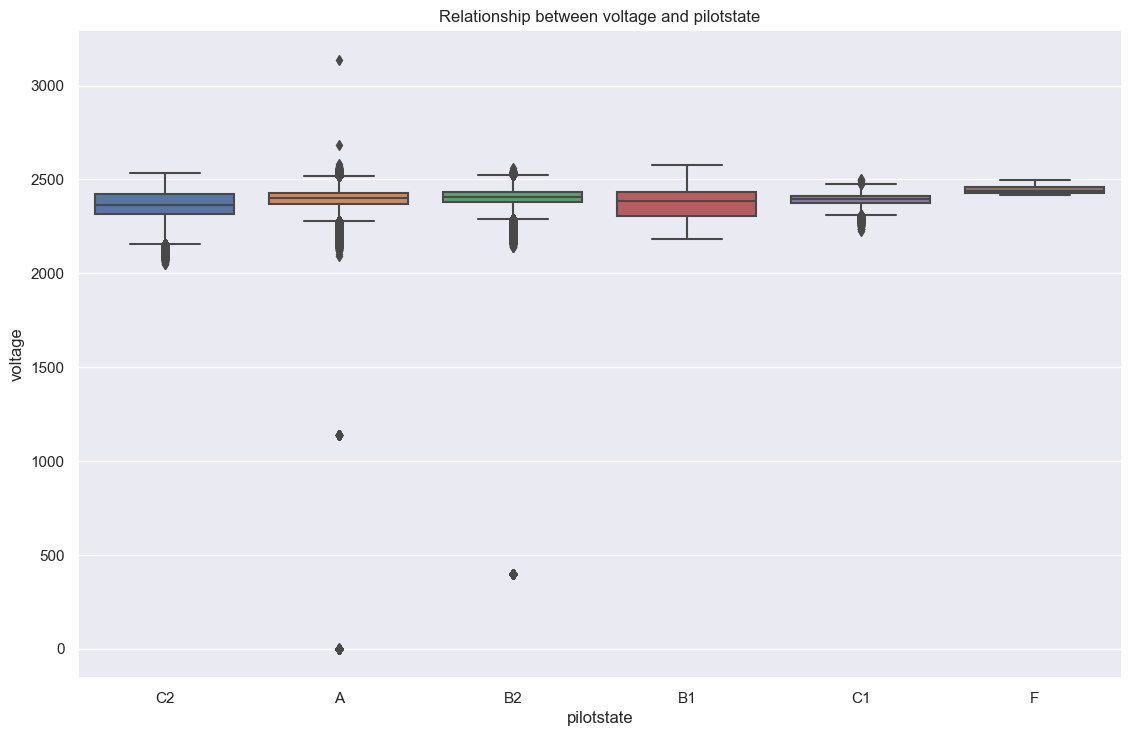

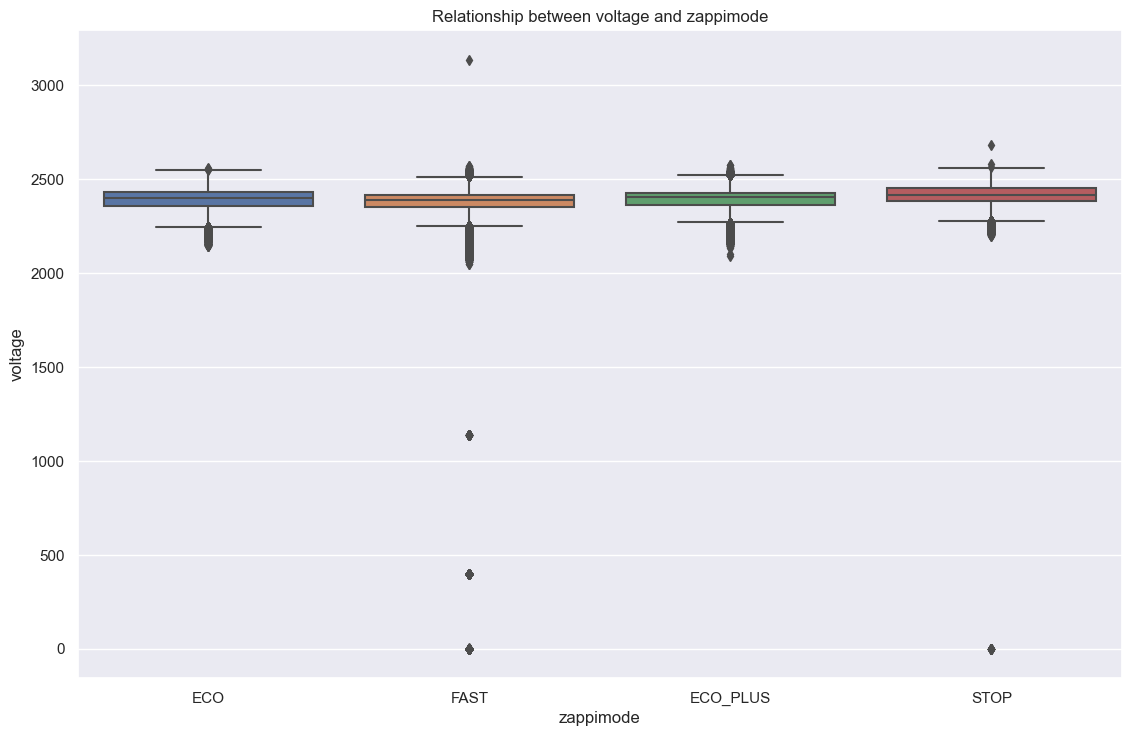

In [90]:

for combination in itertools.product(list(data_columns), repeat=2):

    if combination[0] != combination[1]:
        if combination[0]=='voltage':
            relationship_check(target=combination[0], other=combination[1])



### Relationship between Frequency and other features

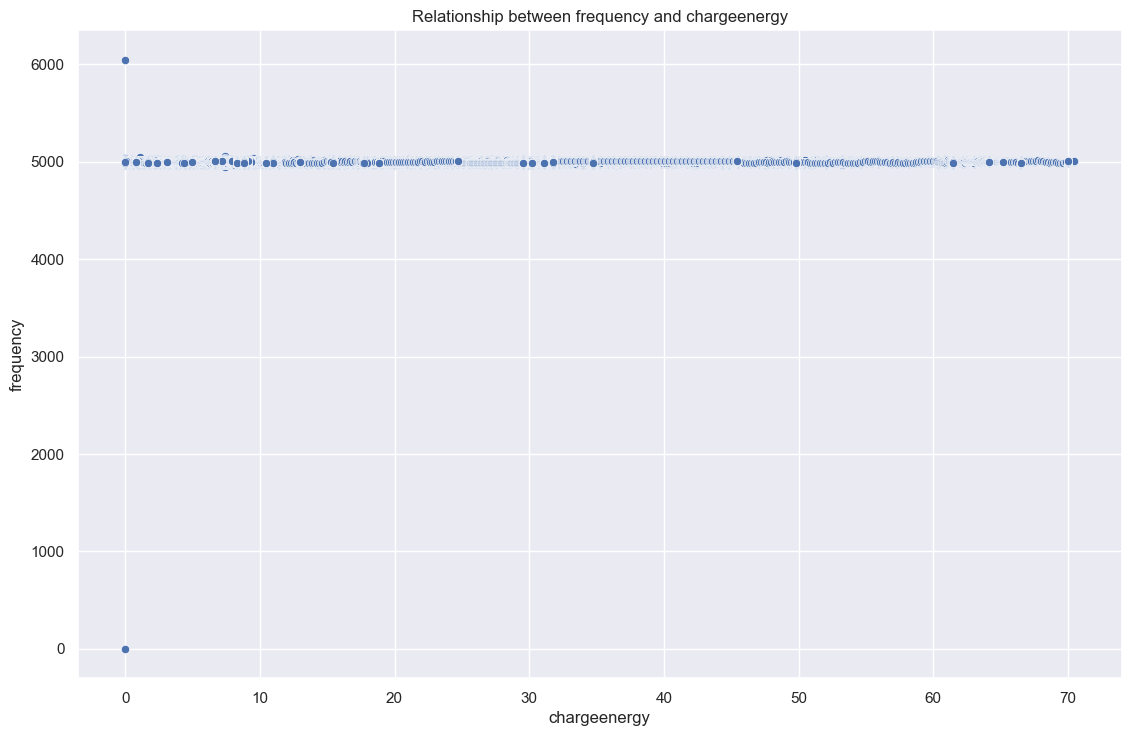

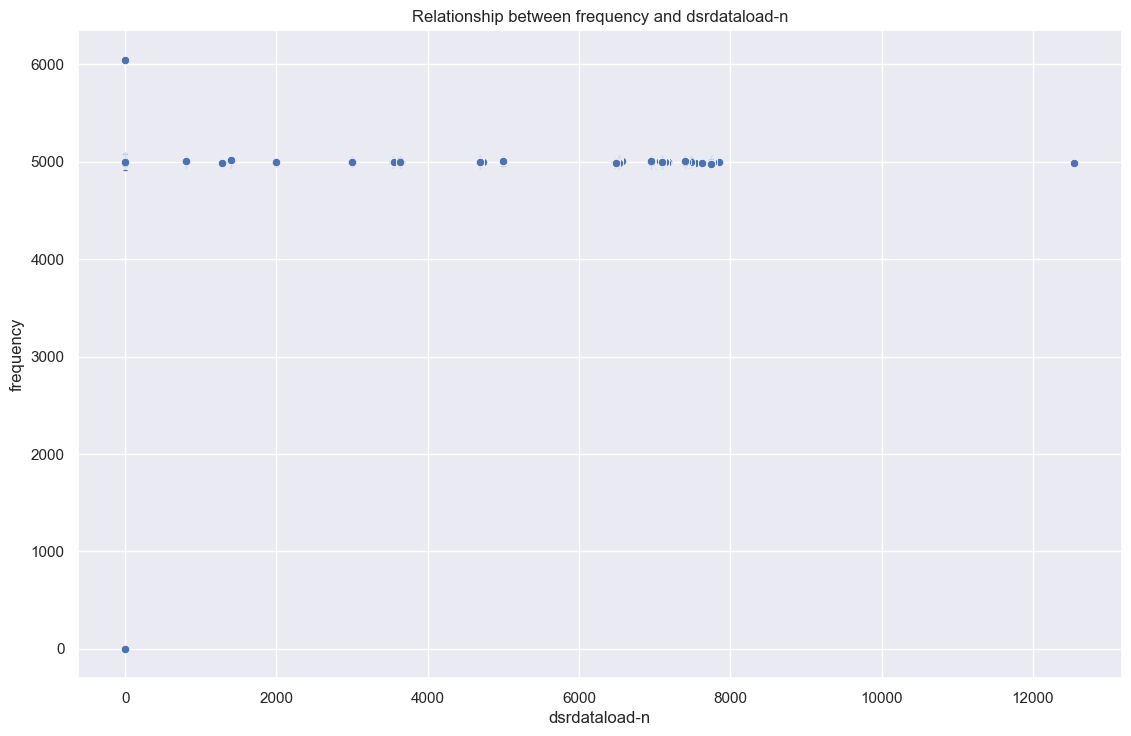

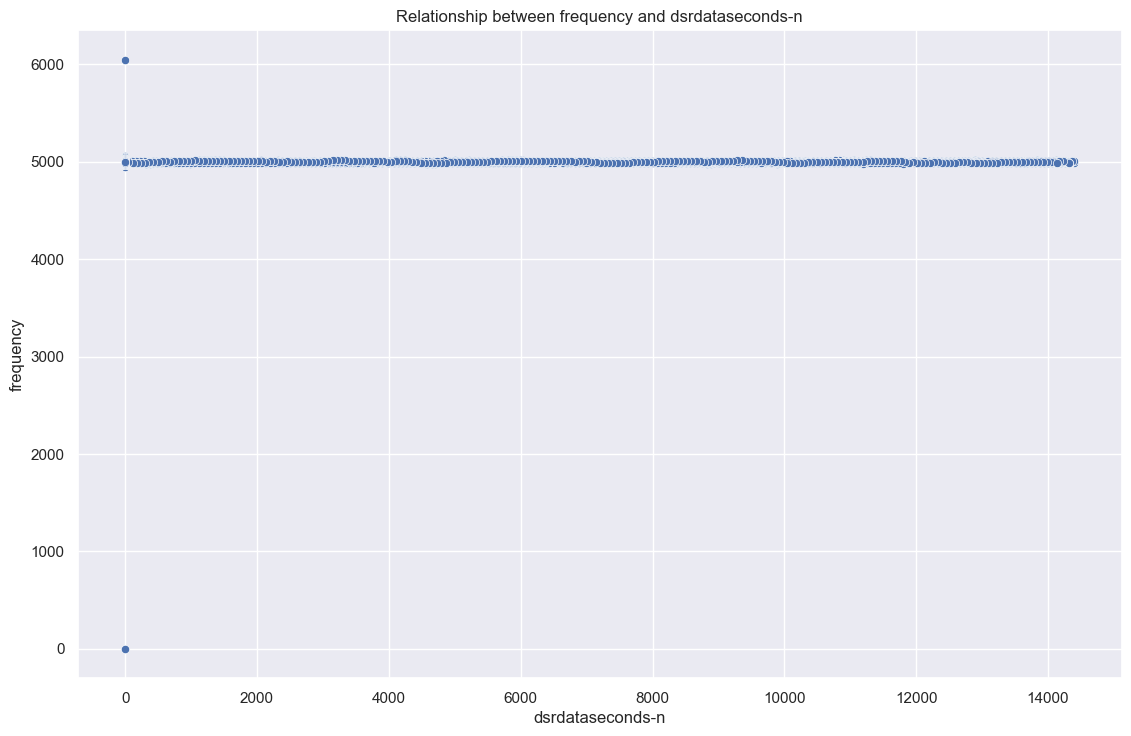

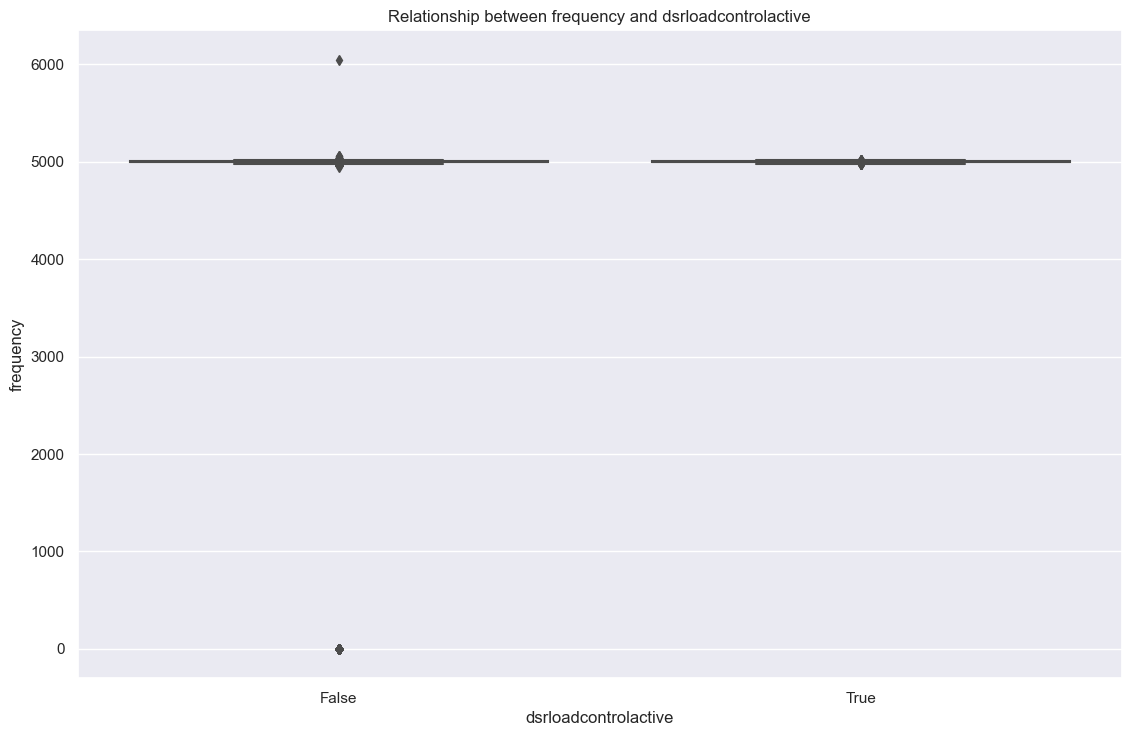

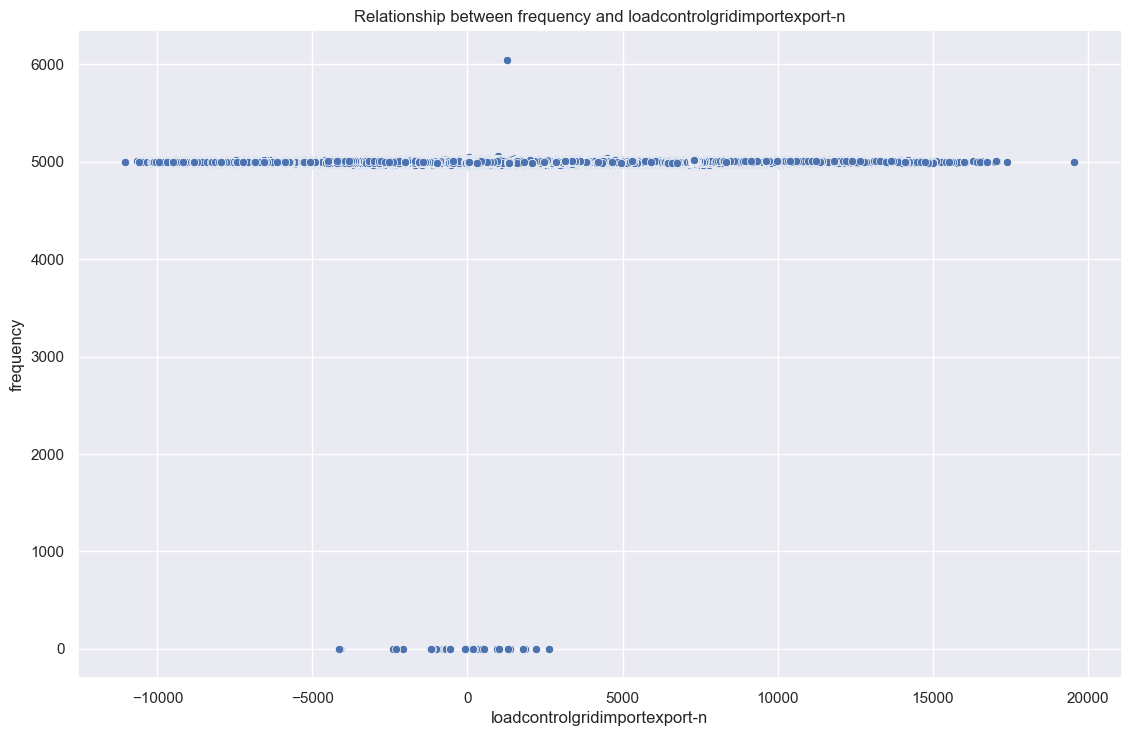

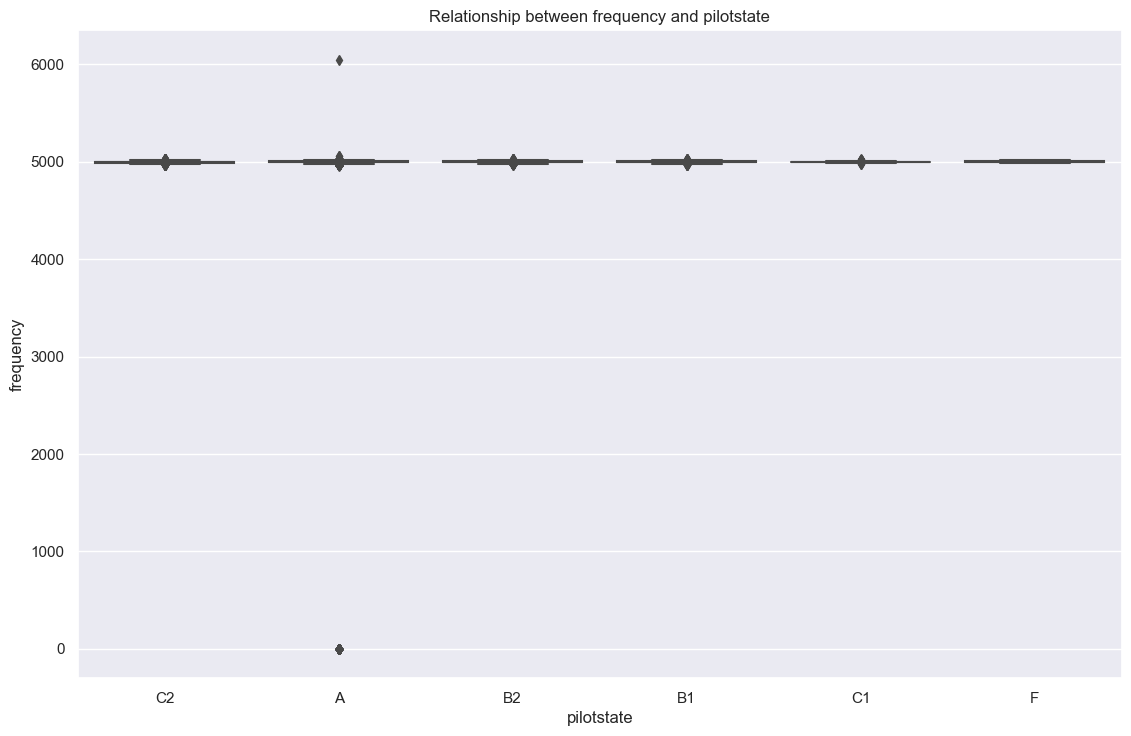

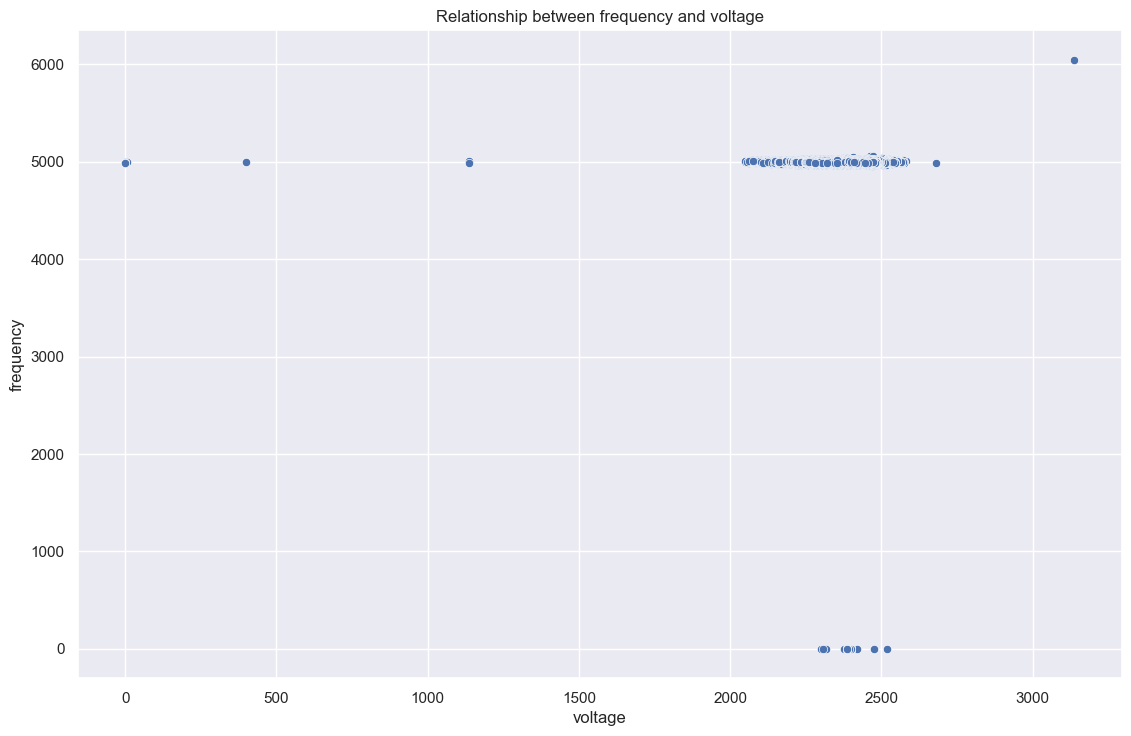

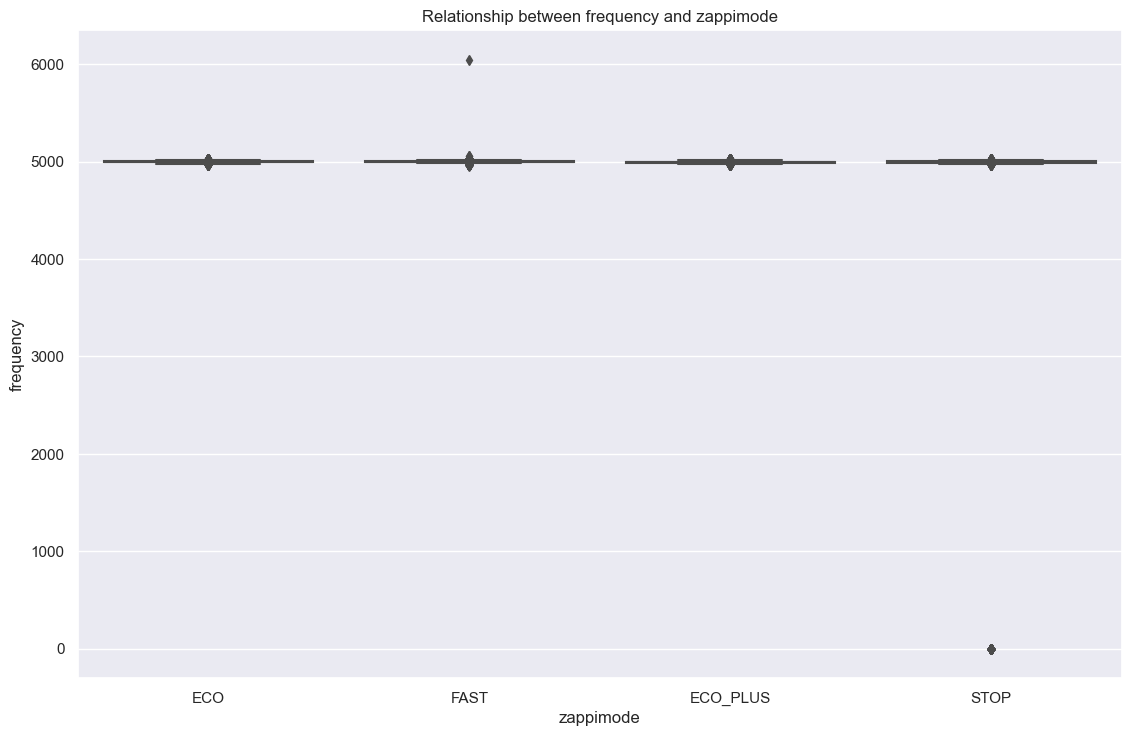

In [103]:
for combination in itertools.product(list(data_columns), repeat=2):

    if combination[0] != combination[1]:
        if combination[0]=='frequency':
            relationship_check(target=combination[0], other=combination[1])

### Relationship between Chargeenergy and other features

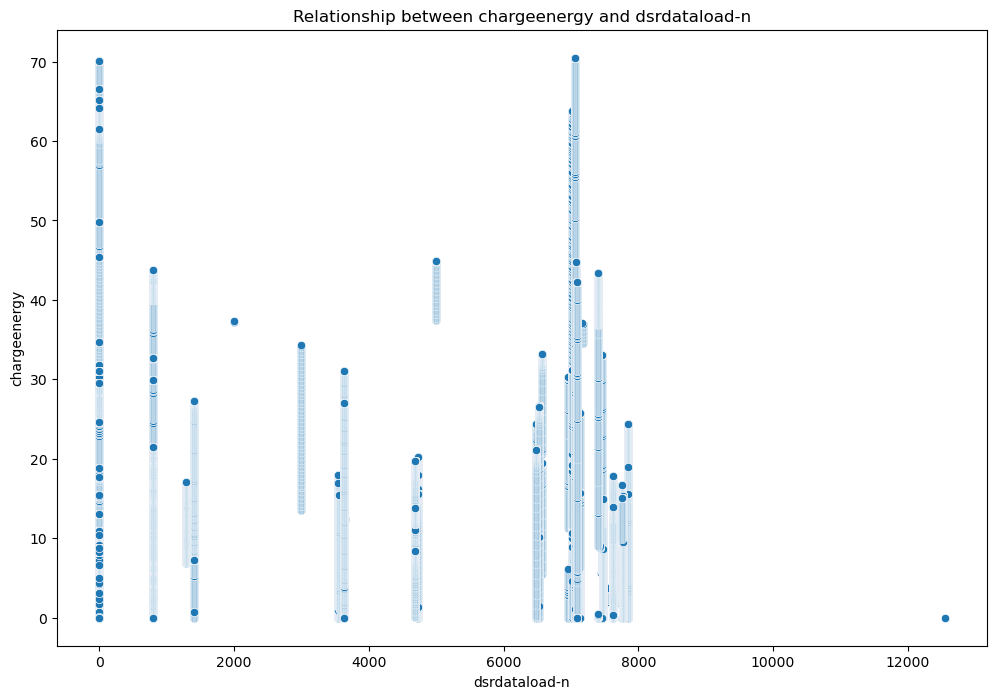

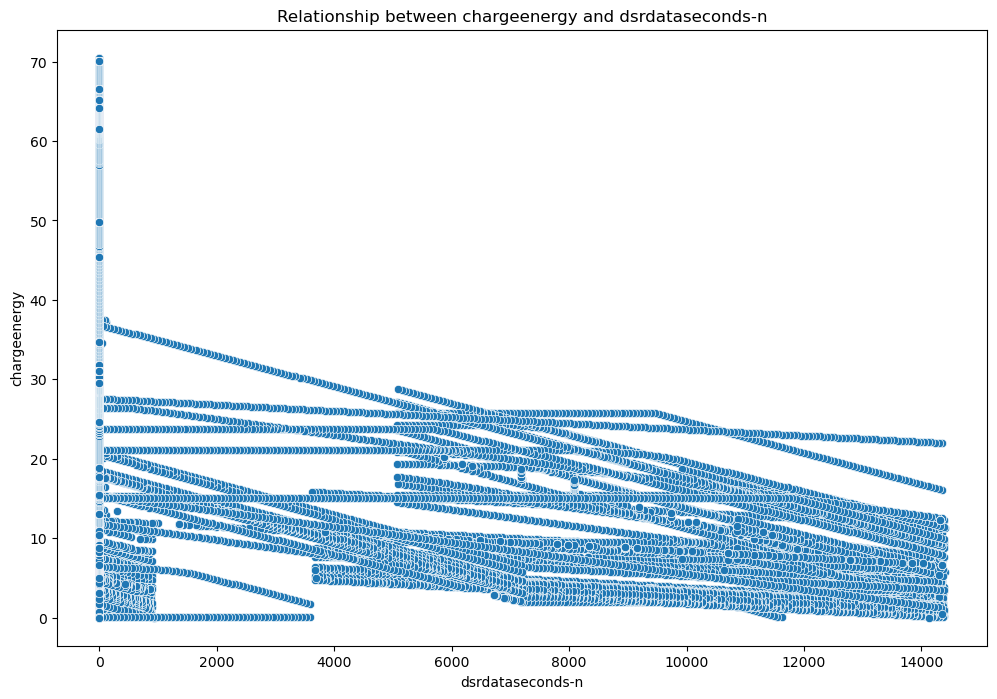

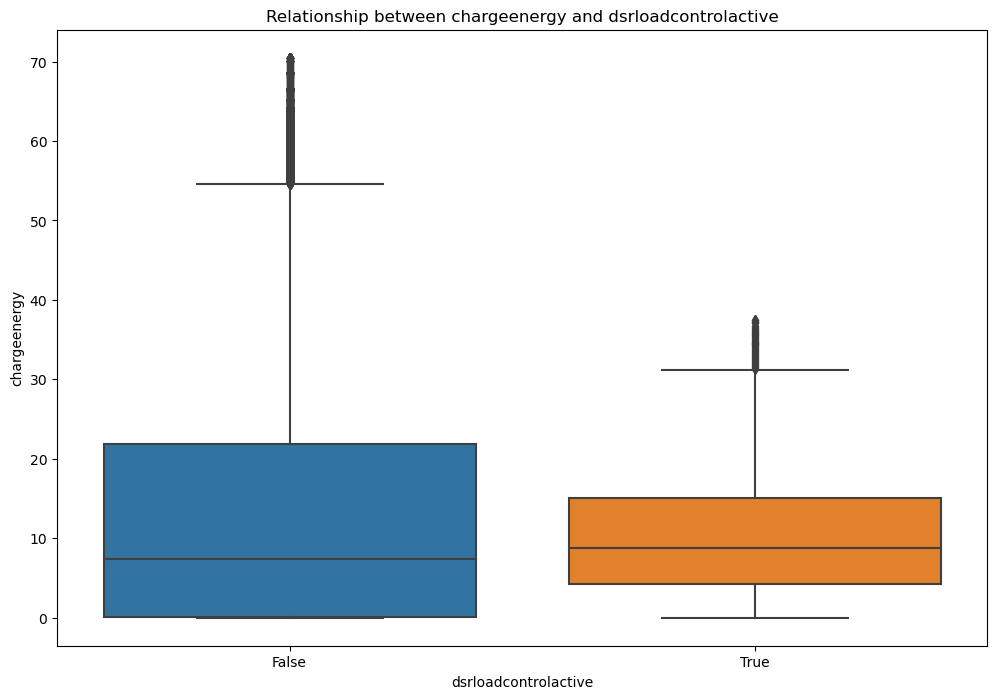

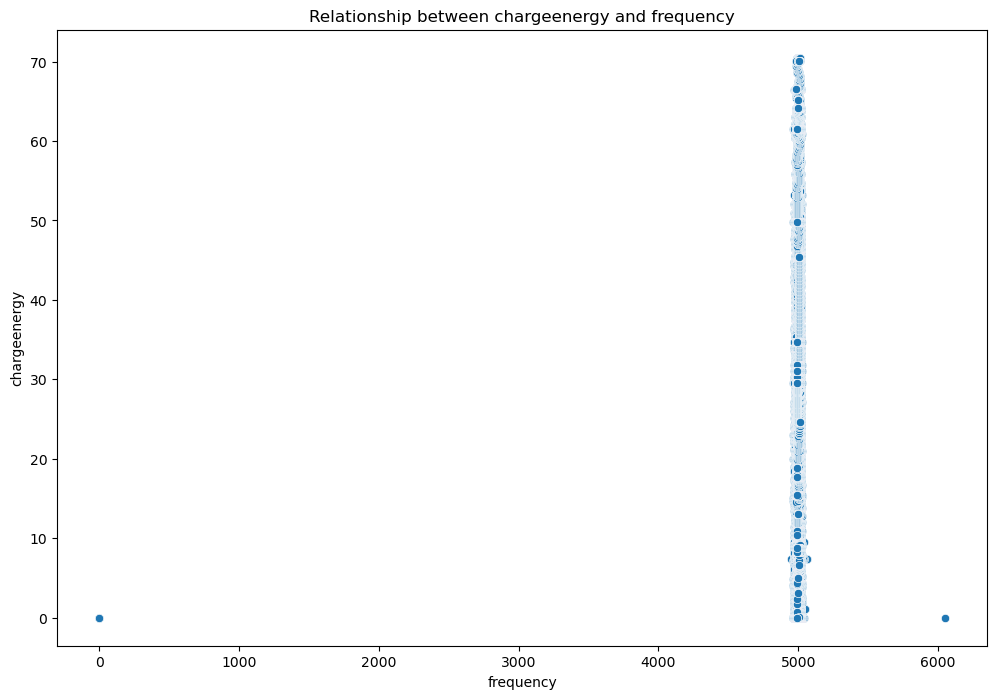

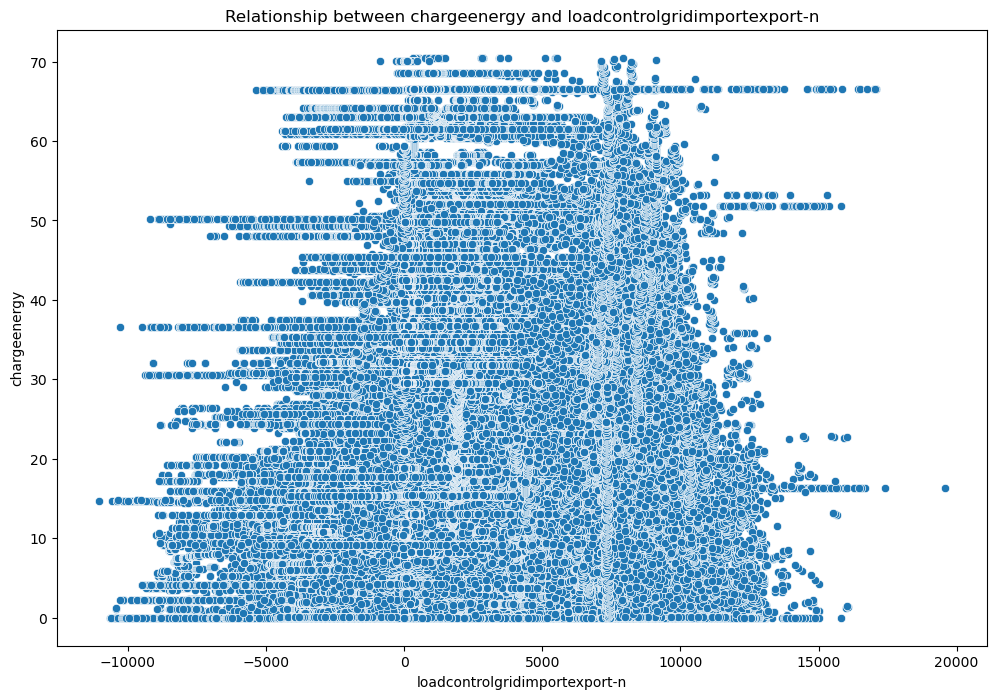

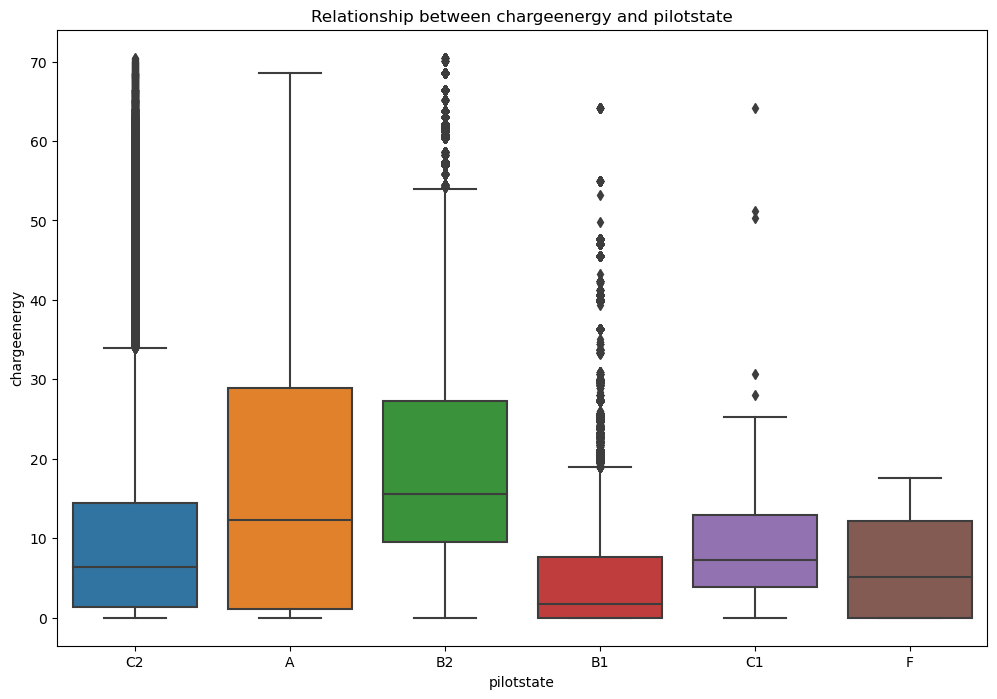

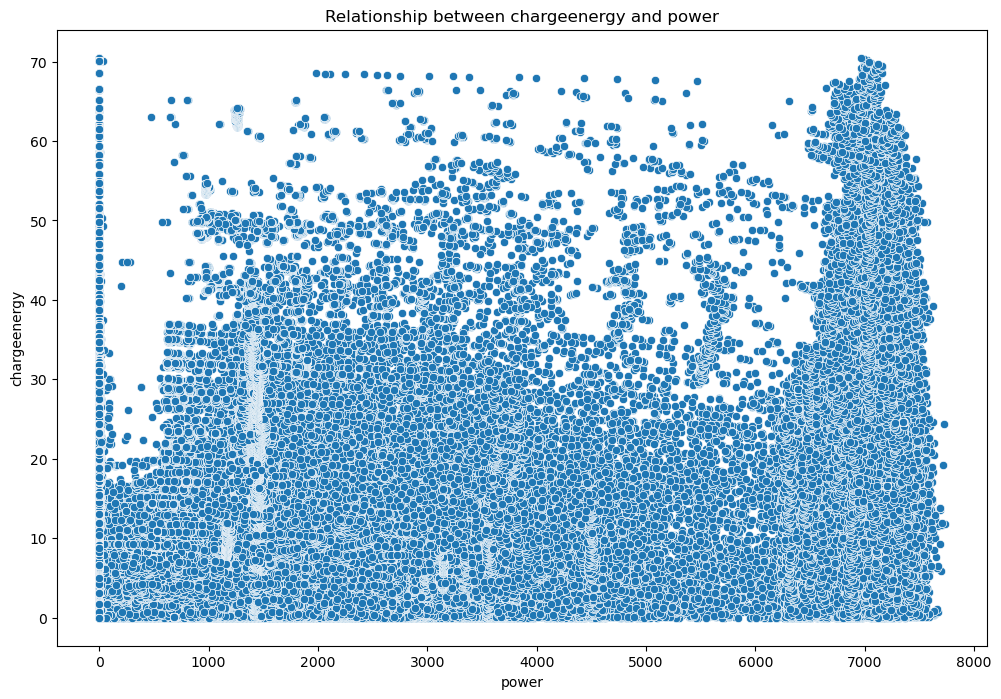

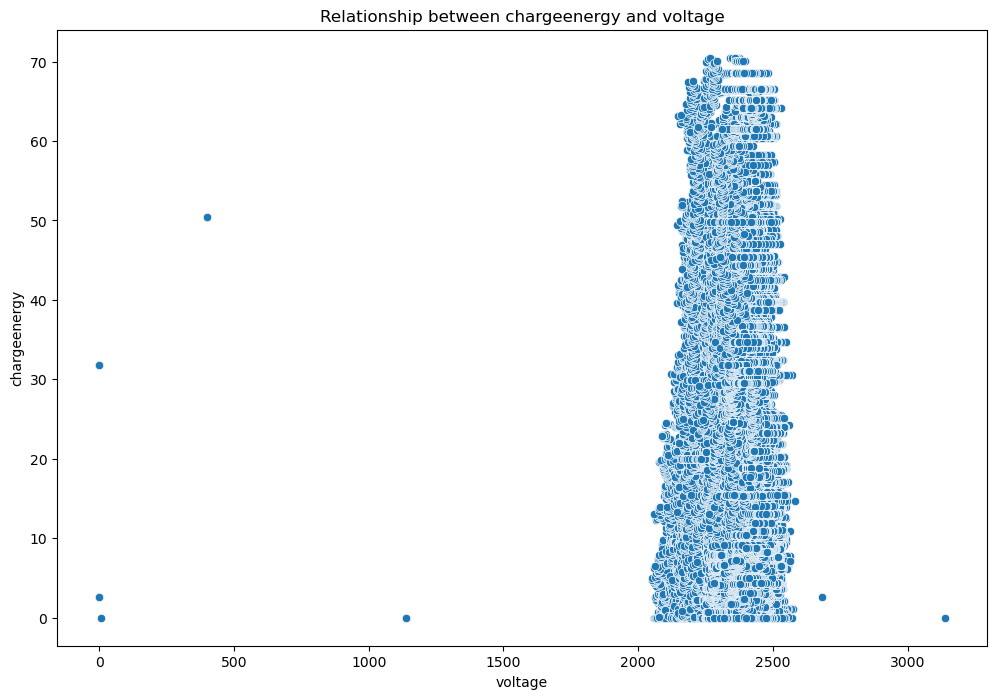

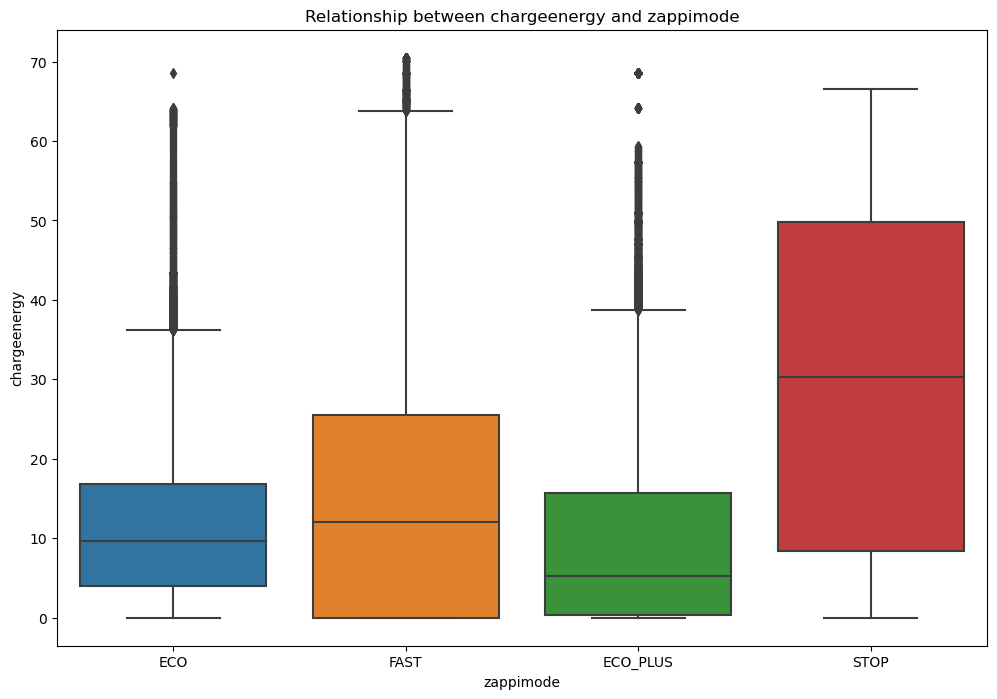

In [13]:
for combination in itertools.product(list(data_columns), repeat=2):

    if combination[0] != combination[1]:
        if combination[0]=='chargeenergy':
            relationship_check(target=combination[0], other=combination[1])

### Crosstabs

#### Relationship between pilotstate and zappimode

In [14]:
pd.crosstab(data.pilotstate, data.zappimode)

zappimode      ECO  ECO_PLUS     FAST    STOP
pilotstate                                   
A           571894    704244  2013437  731205
B1             204    251185       23   60311
B2          109212     38932   279617       0
C1               0      1240        0      41
C2          152774    173792   193920       0
F                1         0        2       1

##### Zappimode and Power

In [16]:
pd.crosstab(data.zappimode, data.power)

power         0     1     2     3     4     5     6     7     8      9     \
zappimode                                                                   
ECO         681336     4     6     5     2     5    44   157    84     38   
ECO_PLUS    996471     9   235    16    92   128    67   136    89  83011   
FAST       2294496     9    17   270    60   148   225   202   245    381   
STOP        791540     0     0     0     0     0     0     0     0      0   

power      10    11    12    13    14    15    16    17    18    19    20    \
zappimode                                                                     
ECO          29    13     5     5     0     2     2     0     0     1     0   
ECO_PLUS     43    25    15    10     5     4     2     3     3     2     2   
FAST        134    45    15     4     0     1     6     1     0     2     2   
STOP          0     0     0     0     0     0     0     0     0     0     0   

power      21    22    23    24    25    26    27    28    29    30    31    \
zappimode                                                                     
ECO           1     0     2     1     3     2     4     2     7    11     8   
ECO_PLUS      0     5     3     3     1     1     2     2     4     0     0   
FAST          1     1     3     2     8     4     7     4     7    11     2   
STOP          0     0     0     0     0     0     0     0     1     0     0   

power      32    33    34    35    36    37    38    39    40    41    42    \
zappimode                                                                     
ECO           2     0     1     2     1     1     3     1     1     1     1   
ECO_PLUS      1     1     1     1     1     0     0     1     1     1     0   
FAST          1     0     0     0     3     1     0     1     2     0     0   
STOP          0     0     0     0     0     0     0     0     0     0     0   

power      43    44    46    47    48    49    50    51    52    53    54    \
zappimode                                                                     
ECO           1     0     0     1     1     1     0     0     0     1     2   
ECO_PLUS      1     1     1     1     1     1     1     1     0     0     0   
FAST          0     2     1     3     1     2     7     4    20    22     9   
STOP          0     0     0     0     0     0     0     0     0     0     0   

power      55    56    57    58    59    60    61    62    63    64    65    \
zappimode                                                                     
ECO           0     1     0     0     1     0     0     0     0     0     0   
ECO_PLUS      0     1     0     0     1     1     0     1     0     1     0   
FAST         17     9    14     8    13    11     8     6     4     4     1   
STOP          0     0     0     0     0     0     0     0     0     0     0   

power      66    67    68    69    70    71    72    73    74    75    76    \
zappimode                                                                     
ECO           0     0     1     1     0     0     0     0     1     0     0   
ECO_PLUS      0     0     0     1     0     1     1     2     1     0     1   
FAST          4     2     5     2     1     6     2     2     3     2     3   
STOP          0     0     0     0     0     0     0     0     0     0     0   

power      77    78    79    80    82    83    84    85    86    87    88    \
zappimode                                                                     
ECO           0     0     0     0     0     0     0     0     1     2     1   
ECO_PLUS      1     0     1     0     1     0     2     0     0     0     0   
FAST          0     1     1     3     2     1     3     1     6     7     4   
STOP          0     0     0     0     0     0     0     0     0     0     0   

power      89    90    91    92    93    94    95    96    98    99    101   \
zappimode                                                                     
ECO           1     0     0     0     0     0     0   

In [19]:
pd.crosstab(data.id, data.zappimode)

zappimode     ECO  ECO_PLUS    FAST    STOP
id                                         
1            3072      1024  119973   46768
2            5247     71205   94371      14
3             715     22053  130391   17678
4               0    170652     185       0
6            3012    105978   61697     150
7            2707     27122  141008       0
8          137778         0   33025      34
9           17118     25357  106918   21444
10              0         0  170837       0
11          11667     20469   21632  117069
12          58408       138   73858   38433
13              0         0  170807      30
14           3087    162249    1957    3544
15          16487     35923   30813   87614
16          70305      8245   25515   64456
17          64701     54985   48792      43
18          16103         0  152387      31
19         103722      1952   62766      81
24              0         0  168514       0
25          91703     68227    8582       0
26          41328    128569     936       4
27              0         0  170251     586
28          47983     74322   48194     338
29              1     11467    8232  151137
31          31300     39063   48490   51984
32              0         0  170837       0
33              0         0  170837       0
34           2654    140279   10560   17344
35              0         0  170837       0
36            245         0    1771  168821
37         104742       114   62026    3955

In [20]:
pd.crosstab(data.id, data.pilotstate)

pilotstate       A     B1     B2   C1     C2  F
id                                             
1           120775    904  35052    5  14101  0
2           101835  32069  20380    0  16551  2
3           143525   7487  13479    0   6346  0
4           142261  15987   2920   16   9653  0
6           143124   5663  13546    0   8504  0
7           160946   2337   2360    1   5193  0
8            92312      0  71542    0   6983  0
9           102124   9042  28969    8  30694  0
10          148507      0  12568    0   9762  0
11          125585   9713  12257   25  23257  0
12          104727  16693   7800    0  41617  0
13          153503     10   9552    0   7772  0
14          115168  30870   1486  352  22961  0
15          106080  36649  14131    0  13976  1
16          142496   3253   6842    0  15930  0
17          119477   4275  23067    1  21701  0
18          168521      0      0    0      0  0
19          143468    397  12938    0  11717  1
24          155138      0   9779    0   3597  0
25          157751    621      2   78  10060  0
26           47988  10566  18787  532  92964  0
27           40657      7  74888    0  55285  0
28          107176  18532  11859    3  33267  0
29          167829      1   1077    0   1930  0
31          140391  11108   8628    0  10710  0
32          161221      0   3305    0   6311  0
33          159401      0   1698    0   9738  0
34           60620  94289   1460  260  14208  0
35          170837      0      0    0      0  0
36          168320    501    518    0   1498  0
37          149017    749   6871    0  14200  0

### Relationship between ChargeEnergy, Zappimode and Pilotstate

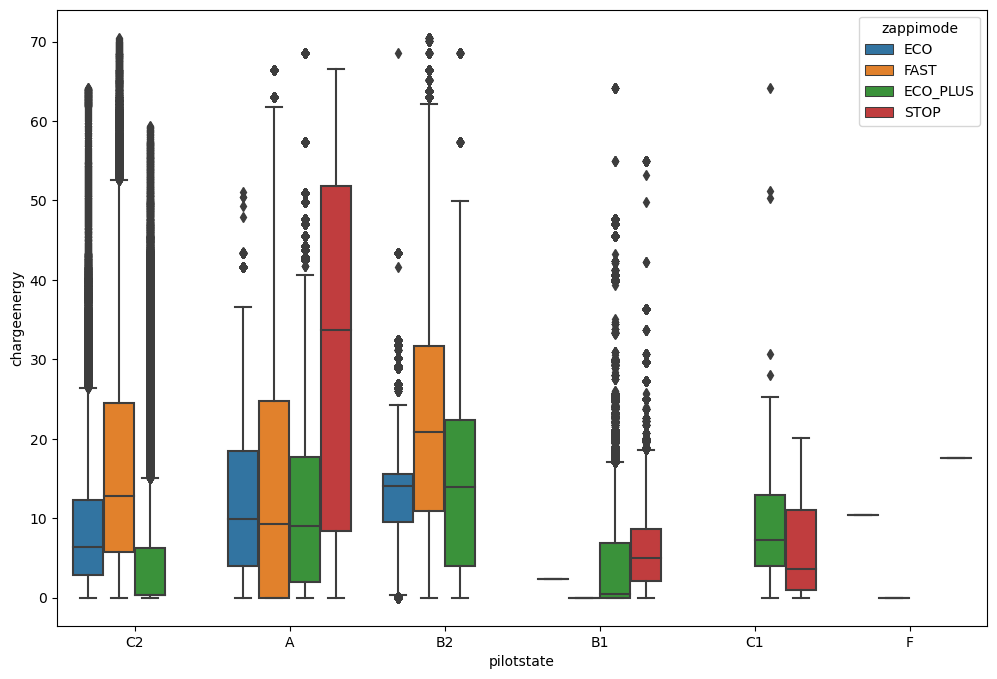

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data, x='pilotstate', y='chargeenergy', hue='zappimode')
plt.show()

### Relationship between Pilotstate, Power, Zappimode

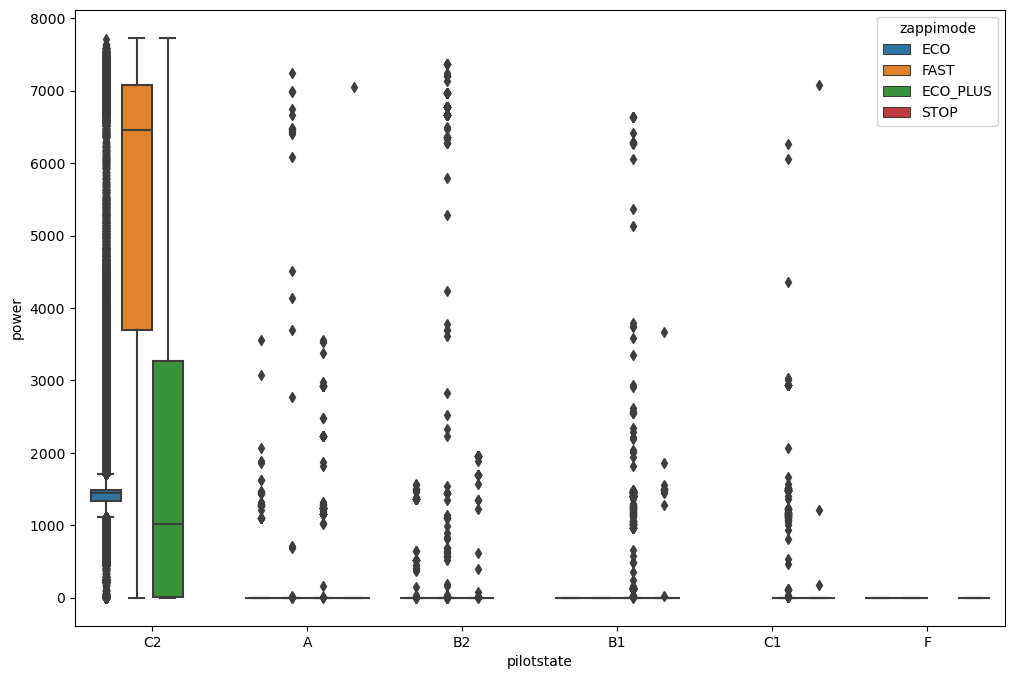

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data, x='pilotstate', y='power', hue='zappimode')
plt.show()

### Relationship between Pilotstate, Voltage, Zappimode

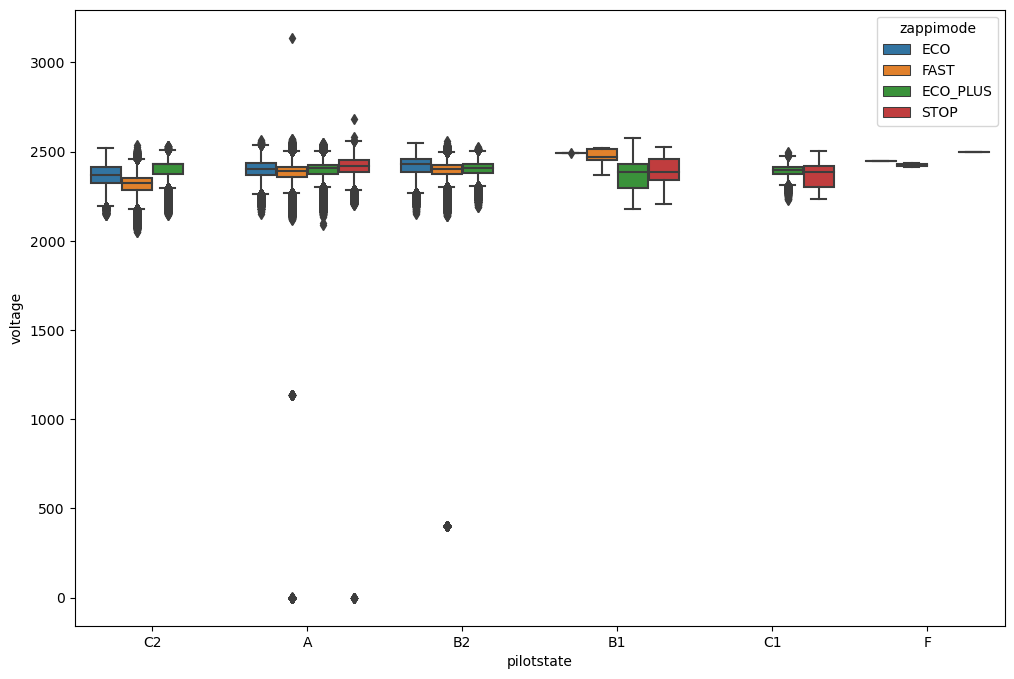

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data, x='pilotstate', y='voltage', hue='zappimode')
plt.show()